# Business Understanding

Consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision :

    - If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company :- Interest loss

    - If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company :- Credit loss

When a client applies for a loan, there are four types of decisions that could be taken by the client/company):
-     **Approved**: The Company has approved loan Application

-     **Cancelled**: The client cancelled the application sometime during approval. Either the client             changed her/his mind about the loan or in some cases due to a higher risk of the client he               received worse pricing which he did not want.

-     **Refused**: The company had rejected the loan (because the client does not meet their                      requirements etc.).

-     **Unused offer**: Loan has been cancelled by the client but on different stages of the process.

# Business Objectives

Driving Factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.

The Analysis is divided into four main parts :
- Data Understanding
- Data Cleaning and Manipulation
- Data Analysis
- Recommendations

# Data Understanding

**1. Loading Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.style as style
style.use('ggplot')

In [3]:
#to view entire data
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)

**2. Structure of Data**

In [4]:
#Reading the application_data
app_data = pd.read_csv("application_data.csv") 
app_data.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [6]:
app_data.shape

(307511, 122)

In [7]:
##Reading the previous_application_data
prev_data = pd.read_csv("previous_application.csv")
prev_data.head(3)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0


In [8]:
prev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [9]:
prev_data.shape

(1670214, 37)

# Data Cleaning and Manipulation

**3. Data Quality Check and Missing Values**

The following steps will be performed in both the dataset: 
- Check the % of Null values for the all the columns
- Drop the rows which have NaN values

A. Checking the number of missing(NaN) values in application dataset

In [10]:
null_percentage = (app_data.isnull().sum()/len(app_data))*100
null_percentage

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [11]:
#Columns with missing values greater than 20%
null_percentage[null_percentage > 20]

OWN_CAR_AGE                     65.990810
OCCUPATION_TYPE                 31.345545
EXT_SOURCE_1                    56.381073
APARTMENTS_AVG                  50.749729
BASEMENTAREA_AVG                58.515956
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BUILD_AVG                 66.497784
COMMONAREA_AVG                  69.872297
ELEVATORS_AVG                   53.295980
ENTRANCES_AVG                   50.348768
FLOORSMAX_AVG                   49.760822
FLOORSMIN_AVG                   67.848630
LANDAREA_AVG                    59.376738
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAREA_AVG                  50.193326
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAREA_AVG               55.179164
APARTMENTS_MODE                 50.749729
BASEMENTAREA_MODE               58.515956
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BUILD_MODE                66.497784
COMMONAREA_MODE                 69.872297
ELEVATORS_MODE                  53.295980
ENTRANCES_MODE                  50

B. Removing columns with more than 20% data missing as imputation might exaggerate data in this case

In [12]:
#Dropping those columns
app_data = app_data.drop(null_percentage[null_percentage > 20].index,1)

In [13]:
app_data.shape #shape after above manipulation

(307511, 72)

In [14]:
#Checking greater than 0 missing values %age of remaining columns
nullseries = app_data.isnull().sum()
null_percentage = nullseries[nullseries > 0]/app_data.shape[0]*100
print(null_percentage)

AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
CNT_FAM_MEMBERS                0.000650
EXT_SOURCE_2                   0.214626
EXT_SOURCE_3                  19.825307
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
DAYS_LAST_PHONE_CHANGE         0.000325
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
dtype: float64


C. Now, we will perform **Imputation** for some of the columns (numerical and categorical) with small missing values' percentage

- Numerical variable : AMT_ANNUITY

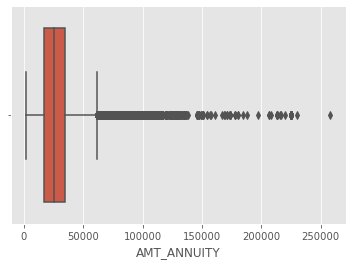

In [15]:
#let's check if this data has any outlier
sns.boxplot(app_data['AMT_ANNUITY']) 
plt.show()

In [16]:
#Since this column is having an outlier which is very large it will be inappropriate to fill the missing values with mean. Hence, here we can impute these values with median.
values=app_data['AMT_ANNUITY'].median()
app_data.loc[app_data['AMT_ANNUITY'].isnull(),'AMT_ANNUITY']=values

In [17]:
app_data["AMT_ANNUITY"].isnull().sum() #We have succefully replaced these null values with the median

0

- Numerical variable : AMT_GOODS_PRICE

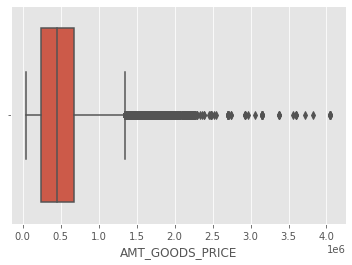

In [18]:
sns.boxplot(app_data['AMT_GOODS_PRICE'])
plt.show()

In [19]:
#Fill the null values with median here as well
median=app_data.AMT_GOODS_PRICE.median()
app_data['AMT_GOODS_PRICE'].fillna(median, inplace=True)

In [20]:
app_data['AMT_GOODS_PRICE'].isnull().sum()

0

- Categorical variable: NAME_TYPE_SUITE

In [21]:
#Missing values in Categorical variable NAME_TYPE_SUITE can be replaced with MODE value 'Unaccompanied'
Mode=app_data.NAME_TYPE_SUITE.mode()[0] 
app_data['NAME_TYPE_SUITE'].fillna(Mode, inplace=True)

In [22]:
app_data['NAME_TYPE_SUITE'].isnull().sum() #doubt 

0

In [23]:
#Imputing Missing values in the following columns with 0 as we are assuming that there were no inquiries.

app_data[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']]= app_data[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK' ,'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].fillna(value=0.0)

There are some columns where the value is mentioned as 'XNA' which means 'Not Available'. So we have to find the number of rows and columns and implement suitable techniques on them to fill those missing values or to delete them.

In [24]:
# For Gender column

app_data[app_data['CODE_GENDER']=='XNA'].shape

(4, 72)

In [25]:
# Describing the Gender column to check the number of females and males

app_data['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64


Since, Female is having the majority and only 4 rows are having NA values, we can update those columns with Gender 'F' as there will be no impact on the dataset.


In [26]:
# Updating the column 'CODE_GENDER' with "F" for the dataset

app_data.loc[app_data['CODE_GENDER']=='XNA','CODE_GENDER']='F'
app_data['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [27]:
# For Organization column

app_data[app_data['ORGANIZATION_TYPE']=='XNA'].shape #doubt

(55374, 72)

In [28]:
app_data=app_data.drop(app_data.loc[app_data['ORGANIZATION_TYPE']=='XNA'].index)
app_data[app_data['ORGANIZATION_TYPE']=='XNA'].shape

(0, 72)

D. Let's look into **Datatypes** of columns

In [29]:
app_data.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE               

In [30]:
#Checking the columns which have 'int64' datatype
app_data.select_dtypes('int64').columns 

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21'],
      dtype='object')

In [31]:
#Checking the columns which have 'object' datatype
app_data.select_dtypes('object').columns 

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE'],
      dtype='object')

In [32]:
#Checking the columns which have 'float' datatype
app_data.select_dtypes('float').columns 

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'CNT_FAM_MEMBERS',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [33]:
#Following variabes can not be float (days, family members and number of people in social circle).
#Therefore, converting few of them to integer
app_data['DAYS_REGISTRATION'] = app_data['DAYS_REGISTRATION'].astype(int,errors='ignore')
app_data['CNT_FAM_MEMBERS'] = app_data['CNT_FAM_MEMBERS'].astype(int,errors='ignore')
app_data['DAYS_LAST_PHONE_CHANGE'] = app_data['DAYS_LAST_PHONE_CHANGE'].astype(int,errors='ignore')
app_data['OBS_30_CNT_SOCIAL_CIRCLE'] = app_data['OBS_30_CNT_SOCIAL_CIRCLE'].astype(int,errors='ignore')
app_data['DEF_30_CNT_SOCIAL_CIRCLE'] = app_data['DEF_30_CNT_SOCIAL_CIRCLE'].astype(int,errors='ignore')
app_data['AMT_REQ_CREDIT_BUREAU_HOUR'] = app_data['AMT_REQ_CREDIT_BUREAU_HOUR'].astype(int,errors='ignore')

Let's check the set of columns we have with us once again

In [34]:
app_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       

- As we can observe that there are certain columns (listed below) which will not have any impact on our analysis, therefore we should drop them too.

In [35]:
unwanted_cols =['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21','AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR','EXT_SOURCE_3']

app_data.drop(labels = unwanted_cols, axis=1,inplace = True)

In [36]:
app_data.shape #new shape after removing all the missing values' and unwanted columns 

(252137, 36)

Let's check the final remained set of columns

In [37]:
app_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'CNT_FAM_MEMBERS', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE'],
      dtype='object')

In [38]:
#Certain rows may still contain null values, therefore we should remove these null values as well
app_data = app_data.dropna(axis=0) #doubt

In [39]:
#Final shape of app_data after performing all the aforementioned Data manipulation steps
app_data.shape  

(250785, 36)

E. **Checking for Outliers and Treating them**

Checking for Outliers

In [40]:
app_data.describe()

#We can observe that few columns have a significant difference between their quantile values.

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
count,250785.000000,250785.000000,250785.000000,2.507850e+05,2.507850e+05,250785.000000,2.507850e+05,250785.000000,250785.000000,250785.000000,250785.000000,250785.000000,250785.000000,250785.000000,250785.000000,250785.000000,250785.000000,250785.000000,250785.000000,250785.000000,2.507850e+05,250785.000000,250785.000000,250785.000000,250785.000000
mean,278114.217692,0.086772,0.498598,1.758112e+05,6.122409e+05,27840.424619,5.499323e+05,0.020872,-14769.183655,-2384.760664,-4634.249058,-2801.233543,2.252846,12.201296,0.017234,0.061834,0.049473,0.089830,0.281217,0.219112,5.160235e-01,1.416185,0.140024,1.399131,0.097725
std,102812.895694,0.281501,0.763332,2.592828e+05,4.067243e+05,14638.324757,3.732549e+05,0.013852,3661.219797,2338.707838,3251.385466,1515.167535,0.942111,3.299554,0.130142,0.240854,0.216853,0.285939,0.449594,0.413646,1.899560e-01,2.400489,0.442030,2.378981,0.358264
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1980.000000,4.050000e+04,0.000290,-25200.000000,-17912.000000,-22928.000000,-7197.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000000,0.000000,0.000000,0.000000
25%,189031.000000,0.000000,0.000000,1.125000e+05,2.785050e+05,17095.500000,2.475000e+05,0.010006,-17563.000000,-3176.000000,-6950.000000,-4177.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.980816e-01,0.000000,0.000000,0.000000,0.000000
50%,278071.000000,0.000000,0.000000,1.575000e+05,5.212800e+05,25879.500000,4.500000e+05,0.018850,-14572.000000,-1648.000000,-4264.000000,-2887.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.669174e-01,0.000000,0.000000,0.000000,0.000000
75%,367165.000000,0.000000,1.000000,2.115000e+05,8.317710e+05,35617.500000,6.975000e+05,0.028663,-11776.000000,-768.000000,-1845.000000,-1488.000000,3.000000,15.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,6.638172e-01,2.000000,0.000000,2.000000,0.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,0.000000,0.000000,0.000000,20.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.549997e-01,348.000000,34.000000,344.000000,24.000000


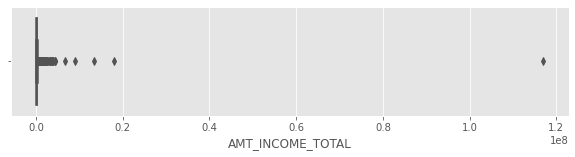

In [41]:
# 1. AMT_INCOME_TOTAL

plt.figure(figsize=(10,2)) 
sns.boxplot(app_data.AMT_INCOME_TOTAL)
plt.show()


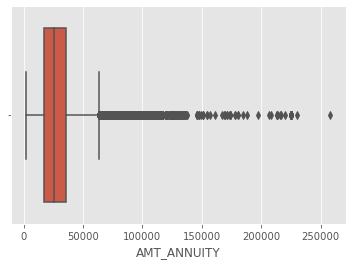

In [42]:
# 2. AMT_ANNUITY

sns.boxplot(app_data.AMT_ANNUITY)
plt.show()

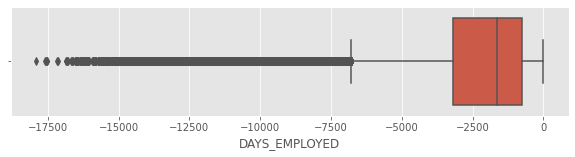

In [43]:
# 3. DAYS_EMPLOYED

plt.figure(figsize=(10,2))
sns.boxplot(app_data.DAYS_EMPLOYED)
plt.show()


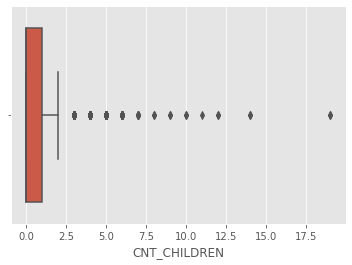

In [44]:
# 4. CNT_CHILDREN
sns.boxplot(app_data.CNT_CHILDREN)
plt.show()

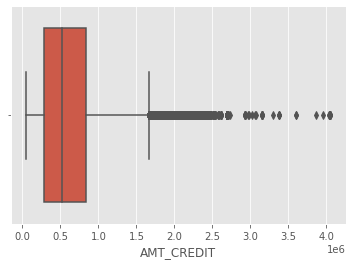

In [45]:
# 5. AMT_CREDIT
sns.boxplot(app_data.AMT_CREDIT)
plt.show()

Treatment of Outliers

In [46]:
#As an add-on, we have performed treatment of outliers for few of the variables too 
#Excluding values outside 99%ile in each of the 3 variables
app_data=app_data[app_data.AMT_ANNUITY<np.nanpercentile(app_data['AMT_ANNUITY'], 99)]
app_data=app_data[app_data.DAYS_EMPLOYED<np.nanpercentile(app_data['DAYS_EMPLOYED'], 99)]
app_data=app_data[app_data.AMT_INCOME_TOTAL<np.nanpercentile(app_data['AMT_INCOME_TOTAL'], 99)]

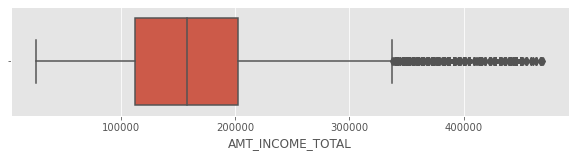

In [47]:
#Let's revisit the treated boxplots again to confirm if our treatment has worked or not
plt.figure(figsize=(10,2))
sns.boxplot(app_data.AMT_INCOME_TOTAL)
plt.show()


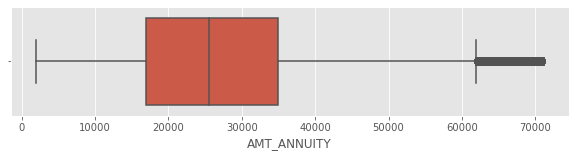

In [48]:
plt.figure(figsize=(10,2))
sns.boxplot(app_data.AMT_ANNUITY)
plt.show()

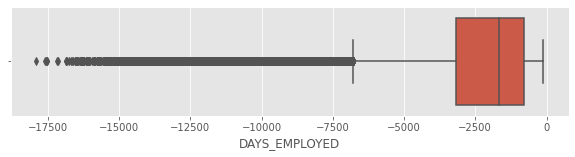

In [49]:
plt.figure(figsize=(10,2)) #only used for checking outliers
sns.boxplot(app_data.DAYS_EMPLOYED)
plt.show()

F. **Binning of continuous variables**

Binned var for AMT_INCOME_TOTAL

In [50]:
#Checking the AMT_INCOME_TOTAL variable
app_data['AMT_INCOME_TOTAL'].describe()

count    243194.000000
mean     168229.817227
std       76883.614650
min       25650.000000
25%      112500.000000
50%      157500.000000
75%      202500.000000
max      469800.000000
Name: AMT_INCOME_TOTAL, dtype: float64

In [51]:
app_data.loc[:,'INCOME_RANGE']=pd.qcut(app_data.loc[:,'AMT_INCOME_TOTAL'],q=[0,0.20,0.50,0.80,1],
labels=['Low','Medium','High','Very_High'])

In [52]:
#Checking Binned Variable
app_data['INCOME_RANGE'].value_counts()

Low          71790
Medium       67621
High         66077
Very_High    37706
Name: INCOME_RANGE, dtype: int64

Binned var for AMT_CREDIT

In [53]:
app_data.loc[:,'CREDIT_BIN']=pd.qcut(app_data.loc[:,'AMT_CREDIT'],q=[0,0.20,0.50,0.80,1],
labels=['Low','Medium','High','Very_High'])

In [54]:
app_data['CREDIT_BIN'].value_counts()

High         74597
Medium       72868
Low          48756
Very_High    46973
Name: CREDIT_BIN, dtype: int64

Binned var for AGE

In [55]:
#DAYS_BIRTH column is Client's age in days at the time of application. Therefore, we need to convert it into years and then perform binning.
#This can be converted to age in years by dividing by 365.25(Considering leap years). Keeping the negative sign into consideration as well.
app_data['AGE'] = app_data['DAYS_BIRTH']//365.25
app_data['AGE'] = app_data['AGE'].abs()

In [56]:
#Now dropping the DAYS_BIRTH column as we no more need it
app_data.drop(['DAYS_BIRTH'],axis=1,inplace=True) 

In [57]:
#Checking the Age variable
app_data.AGE.describe()

count    243194.000000
mean         40.919200
std          10.030717
min          21.000000
25%          33.000000
50%          40.000000
75%          49.000000
max          69.000000
Name: AGE, dtype: float64

In [58]:
#Binning on Age variable 
app_data['AGE_GROUP']= pd.cut(app_data.AGE,bins=np.linspace(20 ,70,num=11))

In [59]:
#Checking binned variable
app_data.AGE_GROUP.value_counts()

(35.0, 40.0]    40947
(40.0, 45.0]    39179
(30.0, 35.0]    37978
(45.0, 50.0]    32764
(25.0, 30.0]    31839
(50.0, 55.0]    29620
(55.0, 60.0]    13381
(20.0, 25.0]    11801
(60.0, 65.0]     4901
(65.0, 70.0]      784
Name: AGE_GROUP, dtype: int64

# Data Analysis

A. **Checking data imbalance**

In [60]:
#Calculating data imbalance with TARGET=0 and TARGET = 1
imbalance_per = app_data.TARGET.value_counts(normalize = True)*100
imbalance_per

0    91.268699
1     8.731301
Name: TARGET, dtype: float64

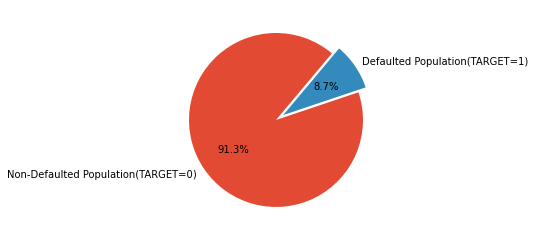

In [61]:
#Figuratively showing it on a pie chart
x = ['Non-Defaulted Population(TARGET=0)', 'Defaulted Population(TARGET=1)']
explode = [0.1, 0]
plt.pie(imbalance_per,explode=explode, labels=x, autopct='%1.1f%%', startangle=50)
plt.show()

**Observation:** We can observe from the above chart that the application dataset has high imbalance with Defaulted population at 8.7% as compared to Non-defualted population at 91.3%. Data Imbalance ratio is 10.5(approx).

B.  **Dividing the dataset into two sets i.e. TARGET=0 and TARGET=1**

In [62]:
app_data_T0 = app_data[app_data.TARGET==0]
app_data_T1 = app_data[app_data.TARGET==1]

C. **Univariate Analysis wrt TARGET 0 and TARGET 1 for categorical variables**

1. Unordered Categorical Variables

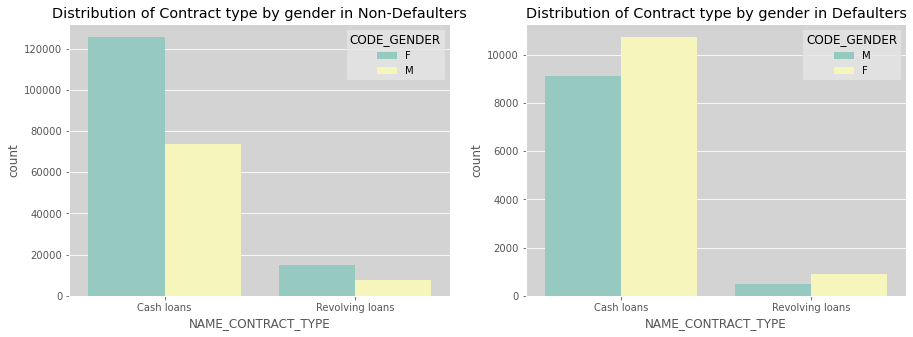

In [65]:
#NAME_CONTRACT_TYPE
fig  = plt.figure(figsize=(15,5)) 
plt.subplot(1,2,1)
ax = sns.countplot("NAME_CONTRACT_TYPE",hue="CODE_GENDER",data=app_data_T0,palette="Set3")
ax.set_facecolor("lightgrey")
ax.set_title("Distribution of Contract type by gender in Non-Defaulters")

plt.subplot(1,2,2)
ax = sns.countplot("NAME_CONTRACT_TYPE",hue="CODE_GENDER",data=app_data_T1,palette="Set3")
ax.set_facecolor("lightgrey")
ax.set_title("Distribution of Contract type by gender in Defaulters")


plt.show()

**Observation:**
- Contract-type ‘cash loans’ are applied more than ‘Revolving loans’. 
- In both the cases, Females have applied for more loans than males.

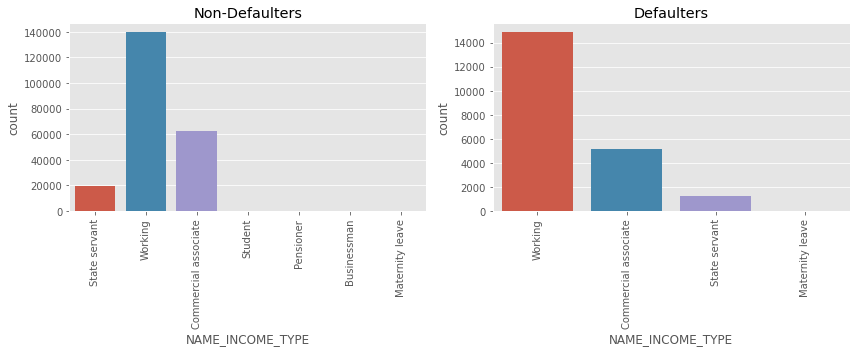

In [68]:
#NAME_INCOME_TYPE
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.countplot(data=app_data_T0, x = 'NAME_INCOME_TYPE', orient='h')
plt.title('Non-Defaulters')
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.countplot(data=app_data_T1, x = 'NAME_INCOME_TYPE', orient='h')
plt.title('Defaulters')
plt.xticks(rotation = 90)

plt.tight_layout()
plt.show()

**Observation:** Working professionals have applied for maximum loans.

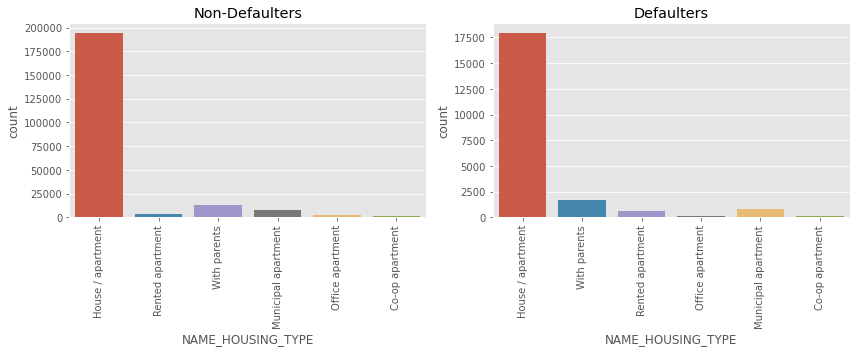

In [67]:
#NAME_HOUSING_TYPE
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.countplot(data=app_data_T0, x = 'NAME_HOUSING_TYPE', orient='h')
plt.title('Non-Defaulters')
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.countplot(data=app_data_T1, x = 'NAME_HOUSING_TYPE', orient='h')
plt.title('Defaulters')
plt.xticks(rotation = 90)

plt.tight_layout()
plt.show()

**Observation:** People with own house/apartment or living 'with parents' are the category of people who have applied for maximum loans.

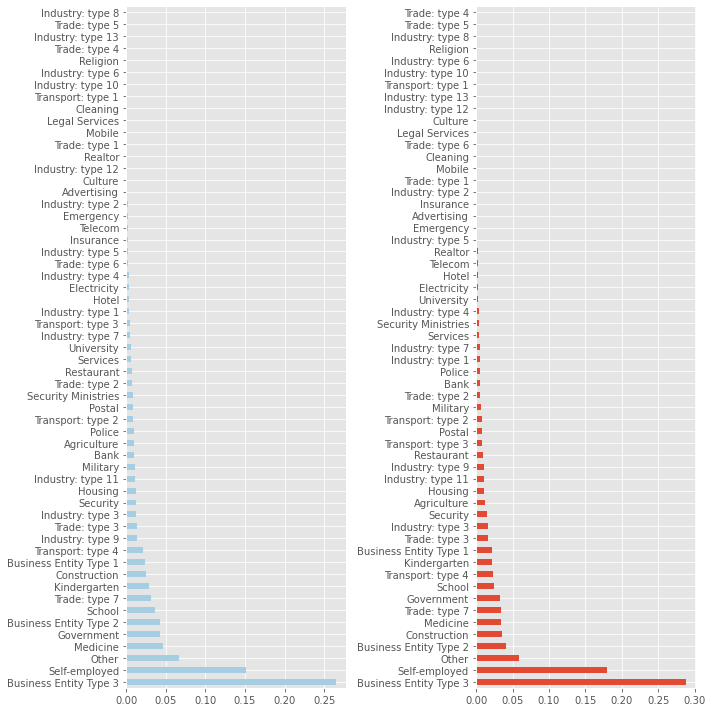

In [64]:
#ORGANIZATION_TYPE
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
app_data_T0["ORGANIZATION_TYPE"].value_counts(normalize = True).plot(kind = 'barh', colormap='Paired')
plt.title('Non-Defaulters')

plt.subplot(1, 2, 2)
app_data_T1["ORGANIZATION_TYPE"].value_counts(normalize = True).plot(kind = 'barh')
plt.title('Defaulters')

plt.tight_layout()
plt.show()

**Observation:** Most of the loans have been applied from the organization types - 'Business Type 3', 'Self-employed', 'Other'.

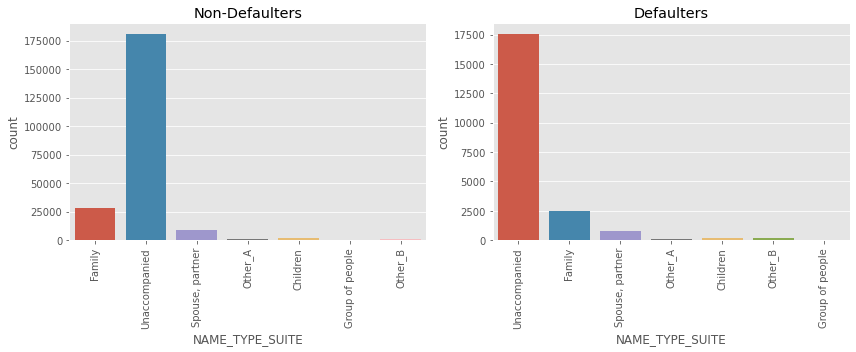

In [66]:
#NAME_TYPE_SUITE
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.countplot(data=app_data_T0, x = 'NAME_TYPE_SUITE', orient='h')
plt.title('Non-Defaulters')
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.countplot(data=app_data_T1, x = 'NAME_TYPE_SUITE', orient='h')
plt.title('Defaulters')
plt.xticks(rotation = 90)

plt.tight_layout()
plt.show()

**Observation:** People are usually 'unaccompanied' while applying for loans.

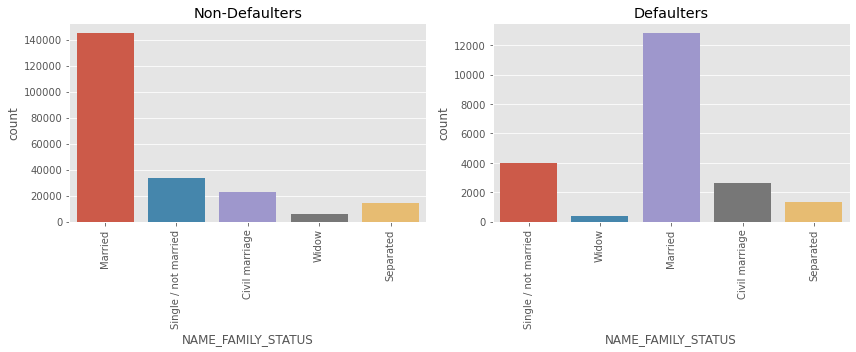

In [69]:
#NAME_FAMILY_STATUS
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.countplot(data=app_data_T0, x = 'NAME_FAMILY_STATUS', orient='h')
plt.title('Non-Defaulters')
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.countplot(data=app_data_T1, x = 'NAME_FAMILY_STATUS', orient='h')
plt.title('Defaulters')
plt.xticks(rotation = 90)

plt.tight_layout()
plt.show()

**Observation:** People who are married require loans the most.

2. Ordered Categorical Variables

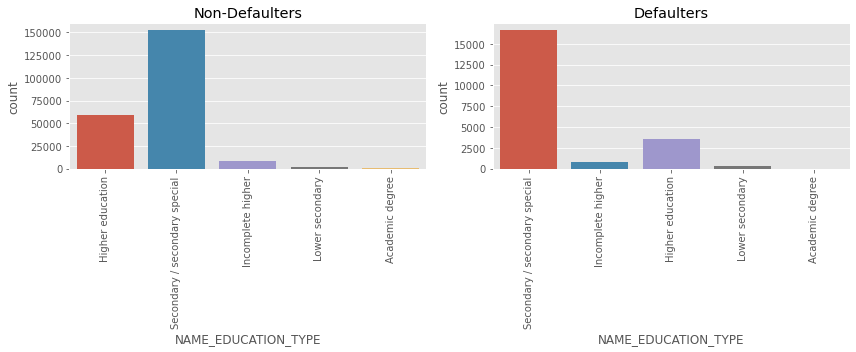

In [70]:
#NAME_EDUCATION_TYPE
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.countplot(data=app_data_T0, x = 'NAME_EDUCATION_TYPE', orient='h')
plt.title('Non-Defaulters')
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.countplot(data=app_data_T1, x = 'NAME_EDUCATION_TYPE', orient='h')
plt.title('Defaulters')
plt.xticks(rotation = 90)

plt.tight_layout()
plt.show()

**Observation:** People with Secondary/Special secondary education type are the ones who need most loans. #check

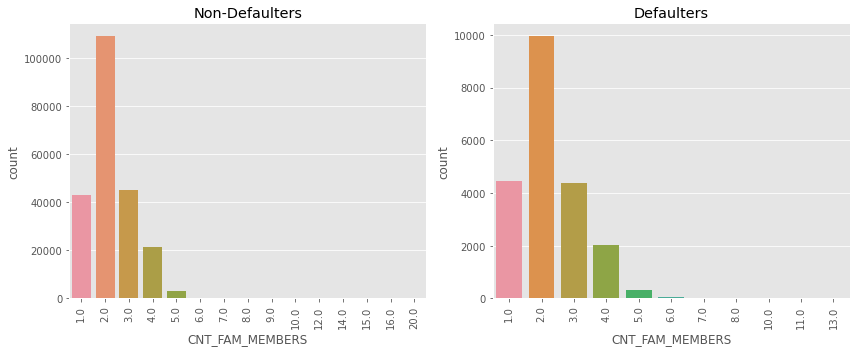

In [71]:
#CNT_FAM_MEMBERS
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.countplot(data=app_data_T0, x = 'CNT_FAM_MEMBERS', orient='h')
plt.title('Non-Defaulters')
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.countplot(data=app_data_T1, x = 'CNT_FAM_MEMBERS', orient='h')
plt.title('Defaulters')
plt.xticks(rotation = 90)

plt.tight_layout()
plt.show()

**Observation:** Most of the people have 2 number of family members.

D. **Correlation for numerical variables for both case - 0 & 1**

For case 0: Non-defaulted population

In [72]:
#Finding correlation for numerical columns for the cases TARGET-0
corr_0= app_data_T0.corr() 
corr_0=corr_0.where(np.triu(np.ones(corr_0.shape), k=1).astype(np.bool))
corr_df0=corr_0.unstack().reset_index()
corr_df0.columns=['Var1','Var2', 'Correlation']
corr_df0.dropna(subset=['Correlation'], inplace=True)
corr_df0['Correlation_Abs']= corr_df0['Correlation'].abs()
corr_df0.sort_values('Correlation_Abs', ascending=False, inplace=True)
Top10_corr0=corr_df0.head(10)
Top10_corr0.reset_index(drop = True)

,Var1,Var2,Correlation,Correlation_Abs
0,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998496,0.998496
1,AMT_GOODS_PRICE,AMT_CREDIT,0.985696,0.985696
2,CNT_FAM_MEMBERS,CNT_CHILDREN,0.893152,0.893152
3,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.861926,0.861926
4,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.861746,0.861746
5,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.820880,0.820880
6,AMT_ANNUITY,AMT_CREDIT,0.777342,0.777342
7,AMT_GOODS_PRICE,AMT_ANNUITY,0.776026,0.776026
8,REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,0.462774,0.462774
9,REG_CITY_NOT_WORK_CITY,REG_CITY_NOT_LIVE_CITY,0.442407,0.442407


For case 1: Defaulted population

In [73]:
#Finding correlation for numerical columns for the cases TARGET-1 
corr_1= app_data_T1.corr() 
corr_1=corr_1.where(np.triu(np.ones(corr_1.shape), k=1).astype(np.bool))
corr_df1=corr_1.unstack().reset_index()
corr_df1.columns=['Var1','Var2', 'Correlation']
corr_df1.dropna(subset=['Correlation'], inplace=True)
corr_df1['Correlation_Abs']= corr_df1['Correlation'].abs()
corr_df1.sort_values('Correlation_Abs', ascending=False, inplace=True)
Top10_corr1= corr_df1.head(10)
Top10_corr1.reset_index(drop = True)

,Var1,Var2,Correlation,Correlation_Abs
0,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998277,0.998277
1,AMT_GOODS_PRICE,AMT_CREDIT,0.981736,0.981736
2,CNT_FAM_MEMBERS,CNT_CHILDREN,0.893635,0.893635
3,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.869088,0.869088
4,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.847263,0.847263
5,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.768680,0.768680
6,AMT_ANNUITY,AMT_CREDIT,0.751275,0.751275
7,AMT_GOODS_PRICE,AMT_ANNUITY,0.748665,0.748665
8,REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,0.504540,0.504540
9,REG_CITY_NOT_WORK_CITY,REG_CITY_NOT_LIVE_CITY,0.477162,0.477162


E. **Obseravtion:** Top 10 correlations in both the Default and Non-default population are same.

F. **Univariate Analysis on continuous variables**

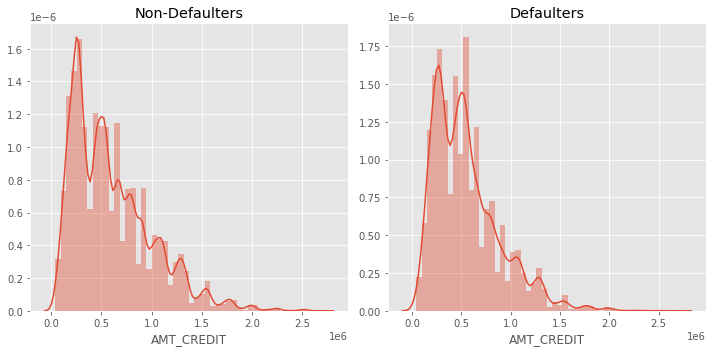

In [74]:
#AMT_CREDIT
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.distplot(app_data_T0['AMT_CREDIT'])
plt.title('Non-Defaulters')

plt.subplot(1,2,2)
sns.distplot(app_data_T1['AMT_CREDIT'])
plt.title('Defaulters')
plt.tight_layout()
plt.show()

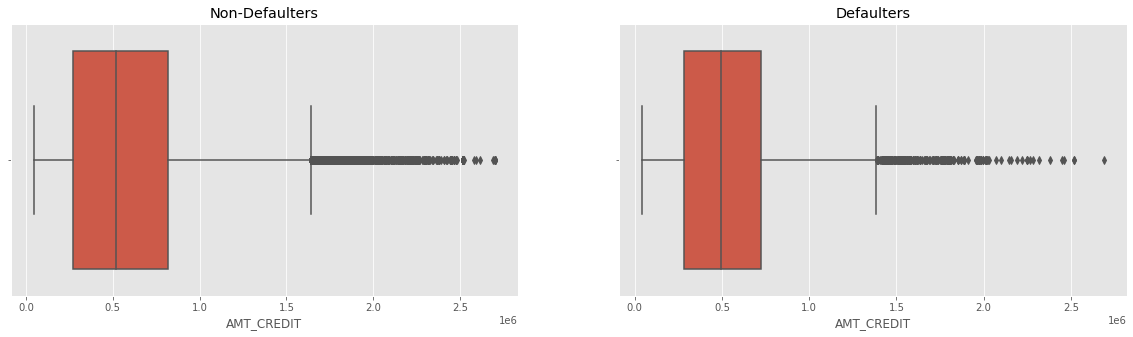

In [75]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.boxplot(app_data_T0.AMT_CREDIT
plt.title('Non-Defaulters')

plt.subplot(1,2,2)
sns.boxplot(app_data_T1.AMT_CREDIT)
plt.title('Defaulters')

plt.show()

**Observation:** Credit Amount is Left Skewed and IQR covers 250K to 750K #doubt

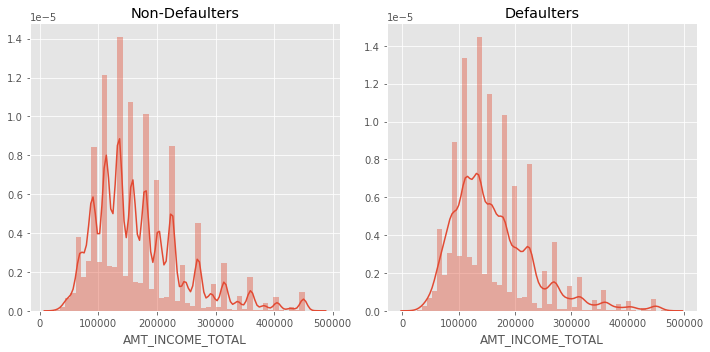

In [76]:
#AMT_INCOME_TOTAL
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.distplot(app_data_T0['AMT_INCOME_TOTAL'])
plt.title('Non-Defaulters')

plt.subplot(1,2,2)
sns.distplot(app_data_T1['AMT_INCOME_TOTAL'])
plt.title('Defaulters')
plt.tight_layout()
plt.show()

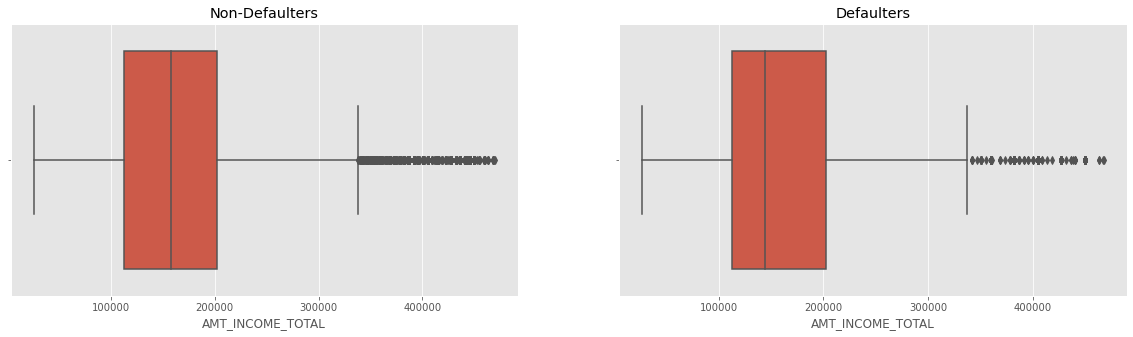

In [77]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.boxplot(app_data_T0.AMT_INCOME_TOTAL) 
plt.title('Non-Defaulters')

plt.subplot(1,2,2)
sns.boxplot(app_data_T1.AMT_INCOME_TOTAL)
plt.title('Defaulters')

plt.show()

**Observation:** 
- Due to few people's very high income the distribution looks highly left skewed making bins and analysing makes more sense which we have already done - 'INCOME_RANGE'.
- Defaulters have unevenly distributed outliers.

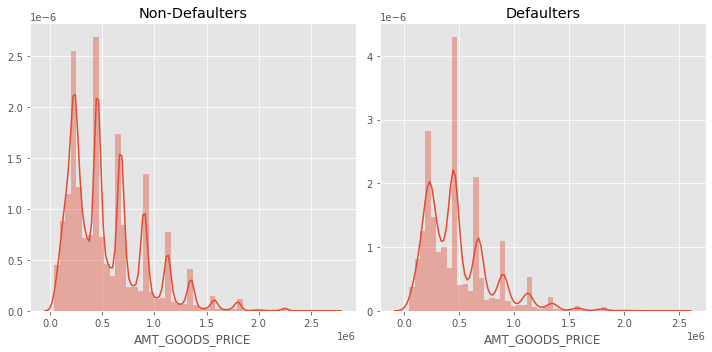

In [78]:
#AMT_GOODS_PRICE
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.distplot(app_data_T0['AMT_GOODS_PRICE'])
plt.title('Non-Defaulters')

plt.subplot(1,2,2)
sns.distplot(app_data_T1['AMT_GOODS_PRICE'])
plt.title('Defaulters')
plt.tight_layout()
plt.show()

**Observation:** People having higher 'Goods price' tend to default less. 

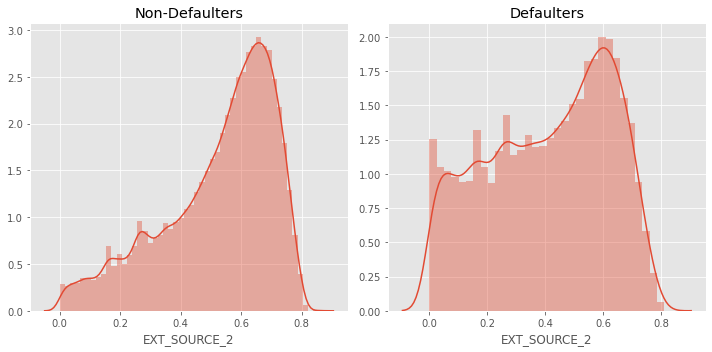

In [79]:
#EXT_SOURCE_2
plt.figure(figsize = (10,5)) 
plt.subplot(1,2,1)
sns.distplot(app_data_T0['EXT_SOURCE_2'])
plt.title('Non-Defaulters')

plt.subplot(1,2,2)
sns.distplot(app_data_T1['EXT_SOURCE_2'])
plt.title('Defaulters')
plt.tight_layout()
plt.show()

**Observation:** For this variable, Defaulters are more distributed as compared to non-defaulters.

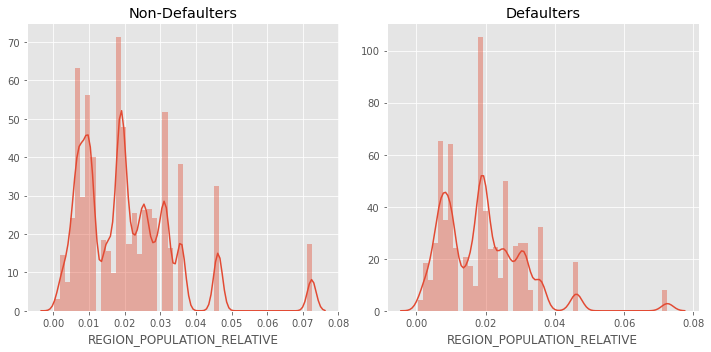

In [80]:
#REGION_POPULATION_RELATIVE
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.distplot(app_data_T0['REGION_POPULATION_RELATIVE'])
plt.title('Non-Defaulters')

plt.subplot(1,2,2)
sns.distplot(app_data_T1['REGION_POPULATION_RELATIVE'])
plt.title('Defaulters')
plt.tight_layout()
plt.show()

**Observation:** People living in higher density areas having lesser defaults 

**Segmented Univariate Analysis**

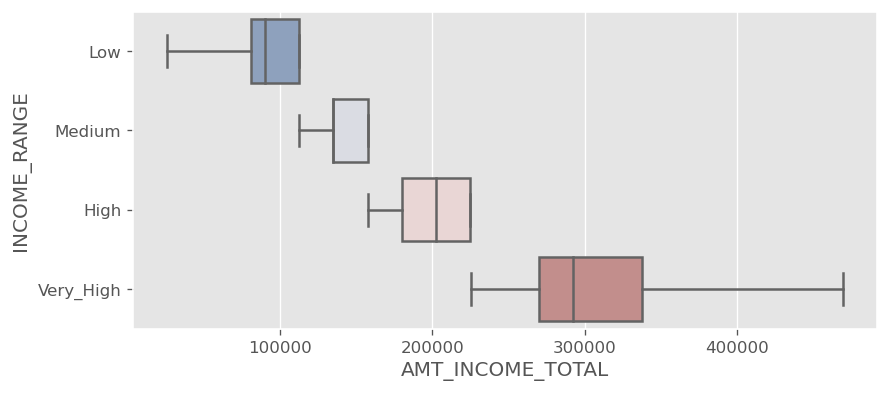

In [81]:
#We can apply segmented univariate analysis on Binned Variables - INCOME_RANGE, AMT_CREDIT and AGE_GROUP
#INCOME_RANGE
plt.figure(figsize=[8.0,3.5],dpi=120,edgecolor='c',frameon=True)
g = sns.boxplot(x="AMT_INCOME_TOTAL", y="INCOME_RANGE", data=app_data,
            whis=[0, 100], palette="vlag")
plt.show()


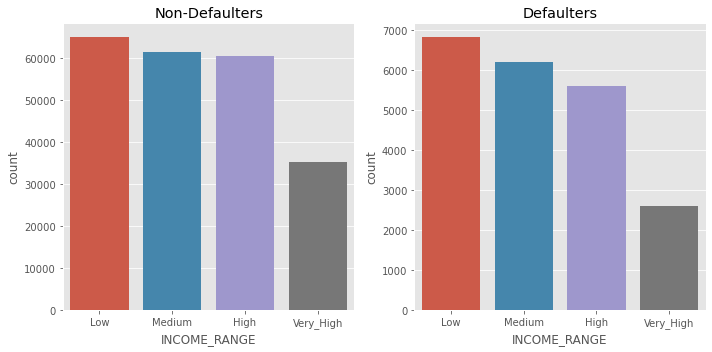

In [82]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
g = sns.countplot(data=app_data_T0,x='INCOME_RANGE', orient='h')
plt.title('Non-Defaulters')


plt.subplot(1,2,2)
g = sns.countplot(data=app_data_T1,x='INCOME_RANGE', orient='h')
plt.title('Defaulters')
plt.tight_layout()
plt.show()

**Observation:** Most of the applied loans are from the category - 'Low' which lies in the range 25k to 120k.

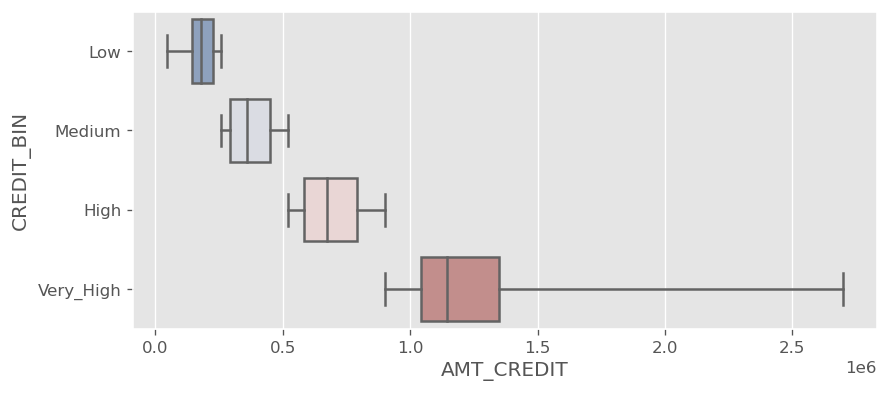

In [83]:
#CREDIT_BIN
plt.figure(figsize=[8.0,3.5],dpi=120,edgecolor='c',frameon=True)
g = sns.boxplot(x="AMT_CREDIT", y="CREDIT_BIN", data=app_data,
            whis=[0, 100], palette="vlag")
plt.show()

**Observation:** Most of the loans have been applied by people with Low credit amount.

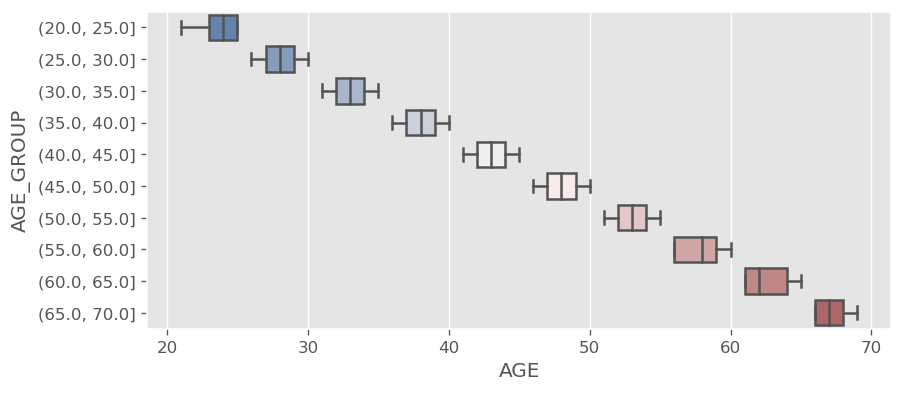

In [84]:
#AGE_GROUP
plt.figure(figsize=[8.0,3.5],dpi=120,edgecolor='c',frameon=True)
g = sns.boxplot(x="AGE", y="AGE_GROUP", data=app_data,
            whis=[0, 100], palette="vlag")
plt.show()


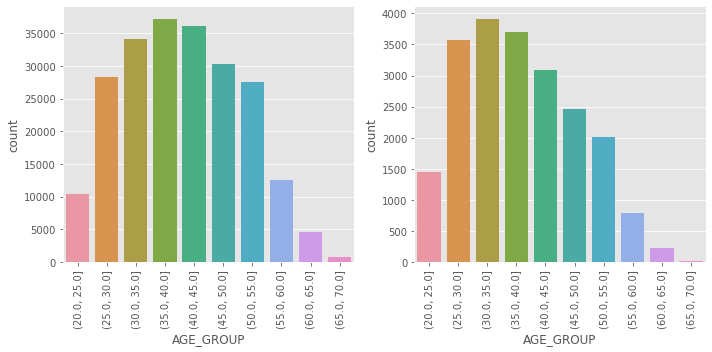

In [85]:
#AGE_GROUP
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
g = sns.countplot(data=app_data_T0,x='AGE_GROUP', orient='h')
plt.xticks(rotation = 90)


plt.subplot(1,2,2)
g = sns.countplot(data=app_data_T1,x='AGE_GROUP', orient='h')
plt.xticks(rotation = 90)

plt.tight_layout()
plt.show()

**Observation:** Most of the loans have been applied by people from the age 25 to 45.

G. **Bivariate Analysis of numerical variables for both TARGET - 0 & 1**

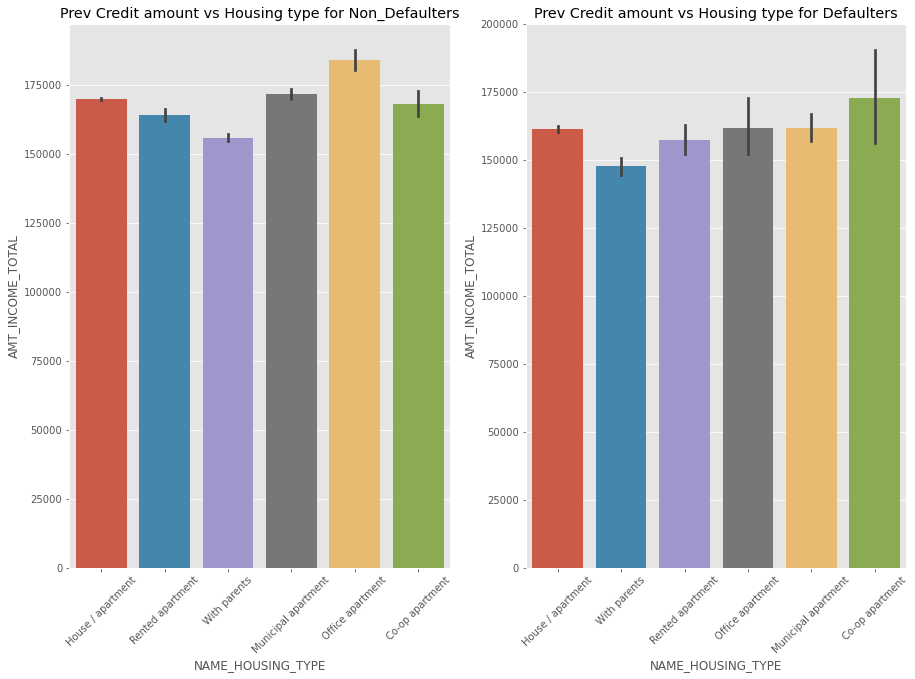

In [86]:
#NAME_HOUSING_TYPE vs. AMT_INCOME_TOTAL
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.xticks(rotation=45)
sns.barplot(data =app_data_T0, x='NAME_HOUSING_TYPE', y='AMT_INCOME_TOTAL')
plt.title('Prev Credit amount vs Housing type for Non_Defaulters')

plt.subplot(1,2,2)
plt.xticks(rotation=45)
sns.barplot(data =app_data_T1, x='NAME_HOUSING_TYPE', y='AMT_INCOME_TOTAL')
plt.title('Prev Credit amount vs Housing type for Defaulters')
plt.show()

**Observation:** A significant difference can be seen in housing_types - 'with parents' and 'office apartments'. These categories have higher non-default rate as compared to the default rate, therefore to target these customers can be benificial. 

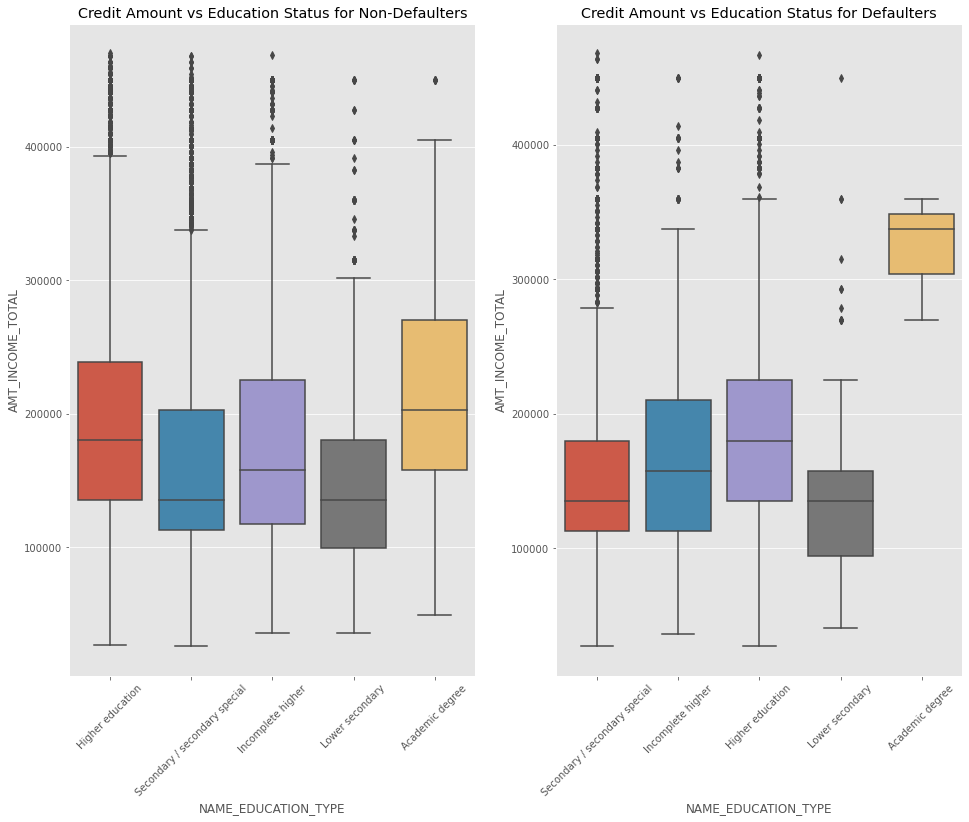

In [87]:
#NAME_EDUCATION_TYPE vs. AMT_INCOME_TOTAL
plt.figure(figsize=(16,12))
plt.subplot(1,2,1)
plt.xticks(rotation=45)
sns.boxplot(data =app_data_T0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', orient='v')
plt.title('Credit Amount vs Education Status for Non-Defaulters')

plt.subplot(1,2,2)
plt.xticks(rotation=45)
sns.boxplot(data =app_data_T1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', orient='v')
plt.title('Credit Amount vs Education Status for Defaulters')
plt.show()

**Observation:** From the defaulters plot, 'Academic-degree' category has the highest default rate between income range of approx 2.5 lacs to 4.5 lacs. Also, very unevenly distributed outliers can be seen in the 'Lower secondary' education type. #check

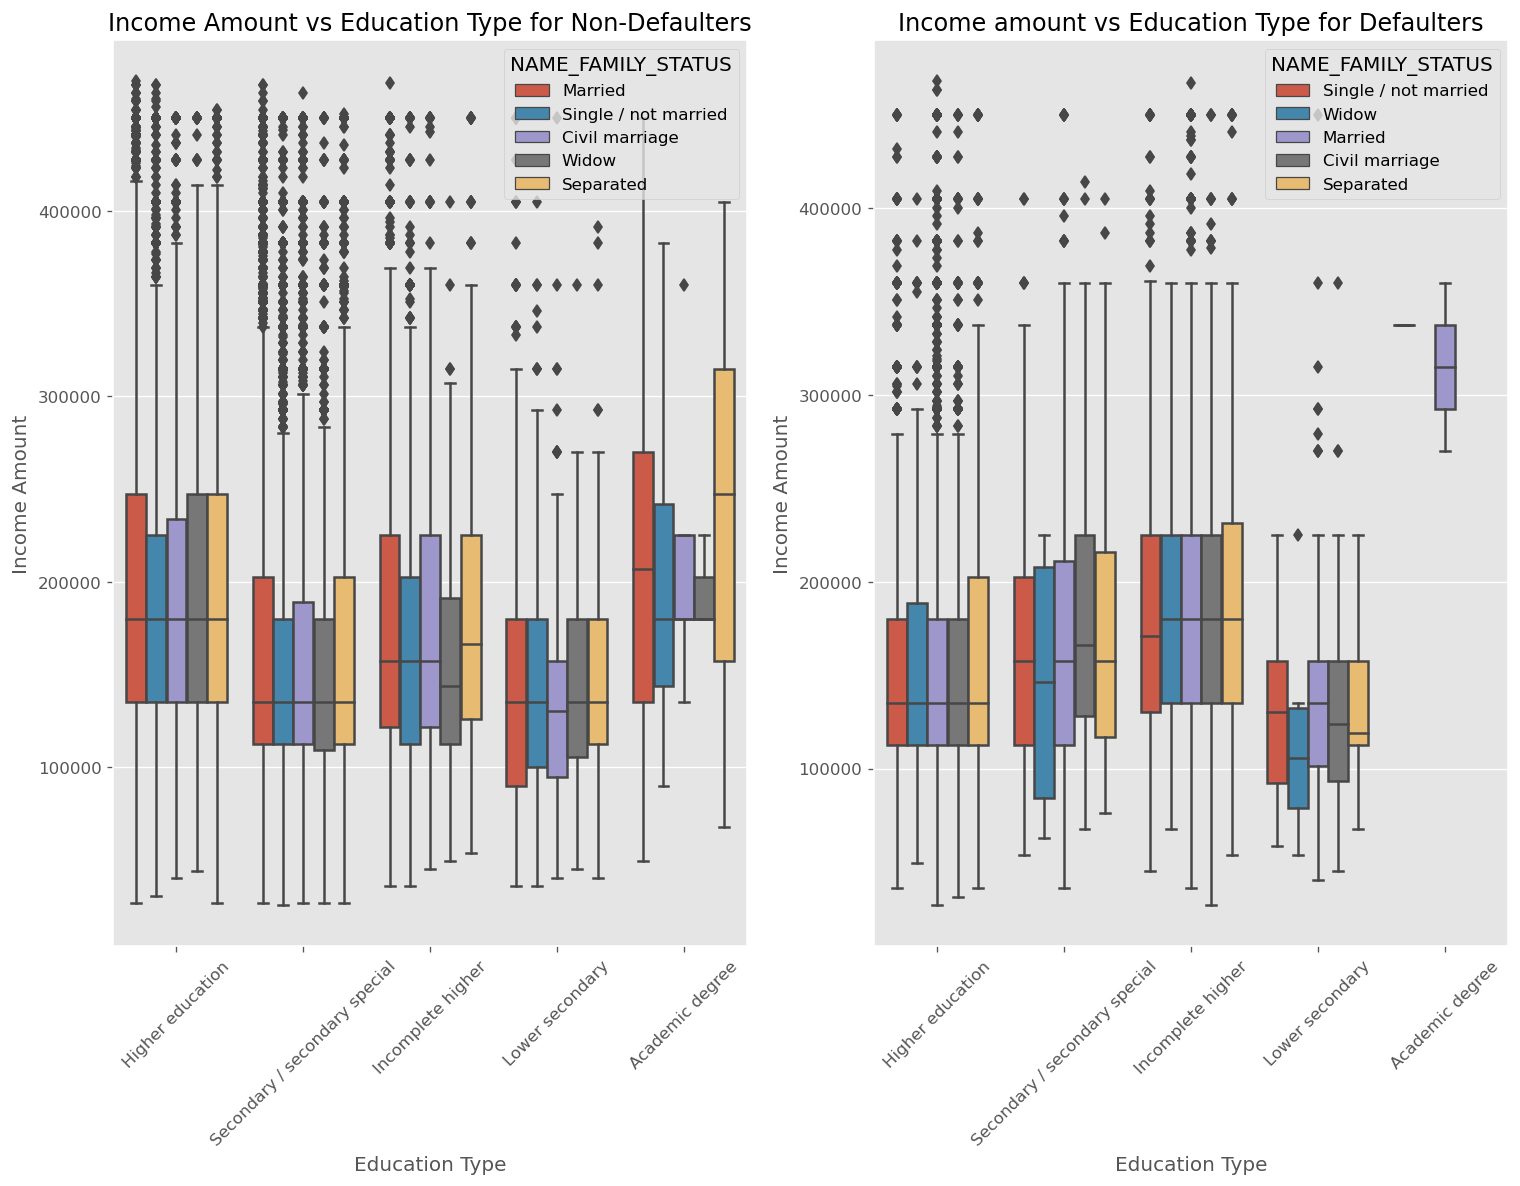

In [88]:
#with hue on NAME_FAMILY_STATUS
plt.figure(figsize=(15,10), edgecolor='c', dpi=120, frameon=True)
plt.subplot(121)
g1 = sns.boxplot(data =app_data_T0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL',hue ='NAME_FAMILY_STATUS', orient='v')
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
g1.set_xlabel("Education Type", fontsize=12)
g1.set_ylabel("Income Amount", fontsize=12)
g1.set_title('Income Amount vs Education Type for Non-Defaulters')

plt.subplot(122)
g2 = sns.boxplot(data =app_data_T1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL',hue ='NAME_FAMILY_STATUS', orient='v')
g2.set_xticklabels(g1.get_xticklabels(),rotation=45)
g2.set_xlabel("Education Type", fontsize=12)
g2.set_ylabel("Income Amount", fontsize=12)
g2.set_title('Income amount vs Education Type for Defaulters')
plt.show()

**Observation:** From the defaulters plot, 'Academic-degree' category has the highest default rate between income range of approx 2.5 lacs to 4.5 lacs and havinf family status as 'Married'.

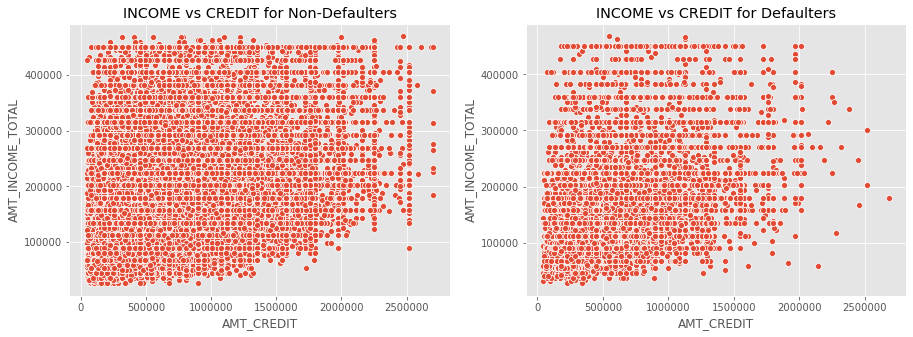

In [89]:
#AMT_CREDIT vs. AMT_INCOME_TOTAL
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.scatterplot(x='AMT_CREDIT',y='AMT_INCOME_TOTAL',data=app_data_T0)
plt.title('INCOME vs CREDIT for Non-Defaulters')
plt.ticklabel_format(style= 'plain')

plt.subplot(122)
sns.scatterplot(x='AMT_CREDIT',y='AMT_INCOME_TOTAL',data=app_data_T1)
plt.title('INCOME vs CREDIT for Defaulters')
plt.ticklabel_format(style= 'plain')
plt.show()

**Observation:** Lower desity of defaults can be seen where income is higher than 3 lacs or credit is greater than 15 lacs.

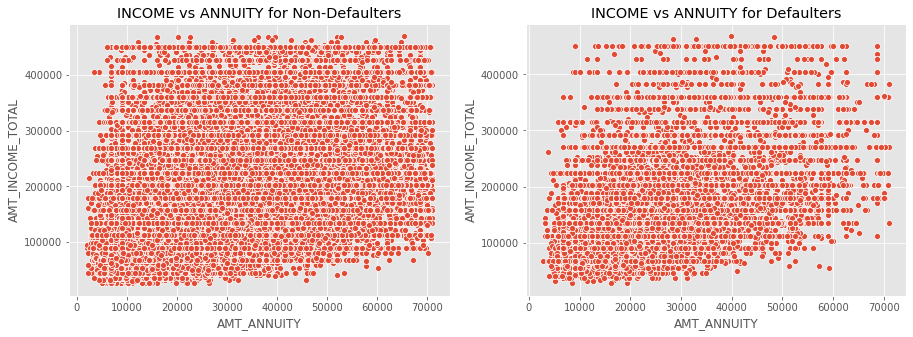

In [90]:
#AMT_ANNUITY vs. AMT_INCOME_TOTAL
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.scatterplot(x='AMT_ANNUITY',y='AMT_INCOME_TOTAL',data=app_data_T0)
plt.title('INCOME vs ANNUITY for Non-Defaulters')

plt.subplot(122)
sns.scatterplot(x='AMT_ANNUITY',y='AMT_INCOME_TOTAL',data=app_data_T1)
plt.title('INCOME vs ANNUITY for Defaulters')
plt.show()

**Observation:** People with Income less than 2 lacs and annuity amount less than 40000 are most likely to default.

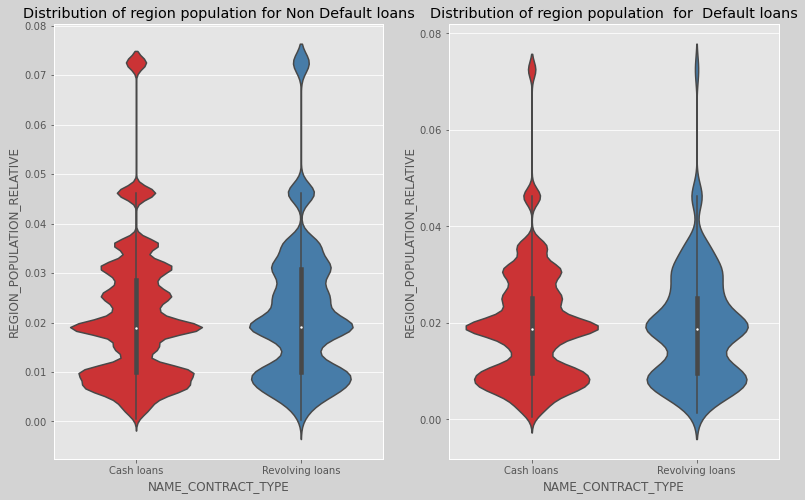

In [91]:
#NAME_CONTRACT_TYPE vs. REGION_POPULATION_RELATIVE
fig = plt.figure(figsize=(13,8))

plt.subplot(121)
sns.violinplot(y=app_data_T0["REGION_POPULATION_RELATIVE"]
               ,x=app_data_T0["NAME_CONTRACT_TYPE"],
               palette="Set1")
plt.title("Distribution of region population for Non Default loans")
plt.subplot(122)
sns.violinplot(y = app_data_T1["REGION_POPULATION_RELATIVE"]
               ,x=app_data_T1["NAME_CONTRACT_TYPE"]
               ,palette="Set1")
plt.title("Distribution of region population  for  Default loans")

plt.subplots_adjust(wspace = .2)
fig.set_facecolor("lightgrey")

**Observation:** In High population Density regions people are less likely to default on loans.

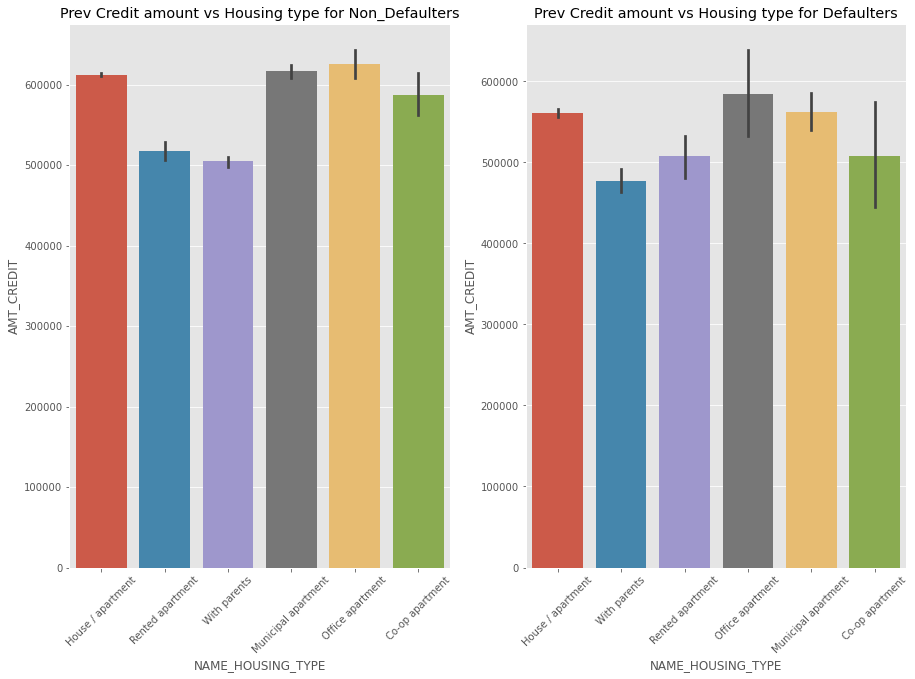

In [92]:
#NAME_HOUSING_TYPE vs. AMT_CREDIT
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.xticks(rotation=45)
sns.barplot(data =app_data_T0, x='NAME_HOUSING_TYPE', y='AMT_CREDIT')
plt.title('Prev Credit amount vs Housing type for Non_Defaulters')

plt.subplot(1,2,2)
plt.xticks(rotation=45)
sns.barplot(data =app_data_T1, x='NAME_HOUSING_TYPE', y='AMT_CREDIT')
plt.title('Prev Credit amount vs Housing type for Defaulters')
plt.show()


**Observation:** A significant difference can be seen in housing_types - 'with parents' and 'office apartments'. These categories have higher non-default rate as compared to the default rate, therefore to target these customers can be benificial. 

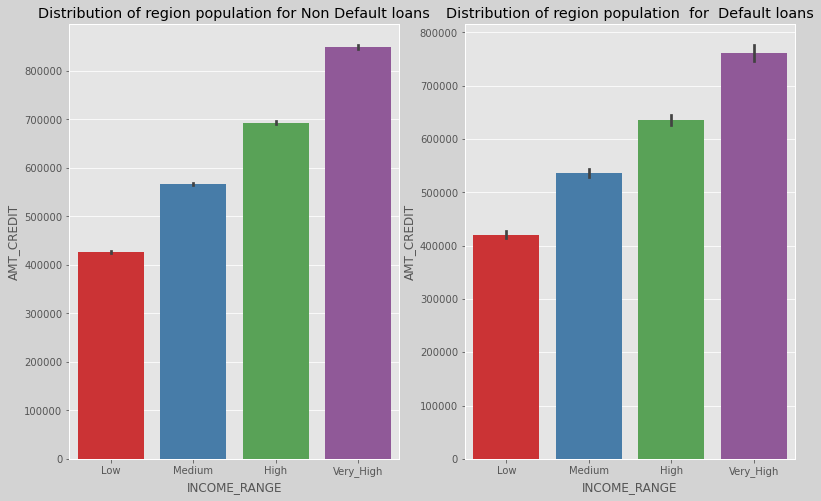

In [93]:
#INCOME_RANGE vs. AMT_CREDIT
fig = plt.figure(figsize=(13,8))

plt.subplot(121)
sns.barplot(y=app_data_T0["AMT_CREDIT"]
               ,x=app_data_T0["INCOME_RANGE"],
               palette="Set1")
plt.title("Distribution of region population for Non Default loans")
plt.subplot(122)
sns.barplot(y = app_data_T1["AMT_CREDIT"]
               ,x=app_data_T1["INCOME_RANGE"]
               ,palette="Set1")
plt.title("Distribution of region population  for  Default loans")

plt.subplots_adjust(wspace = .2)
fig.set_facecolor("lightgrey")

**Observation:** People with 'High' and 'Very-high' income range are least likely to default as they have higher non-default rate than default rate. 

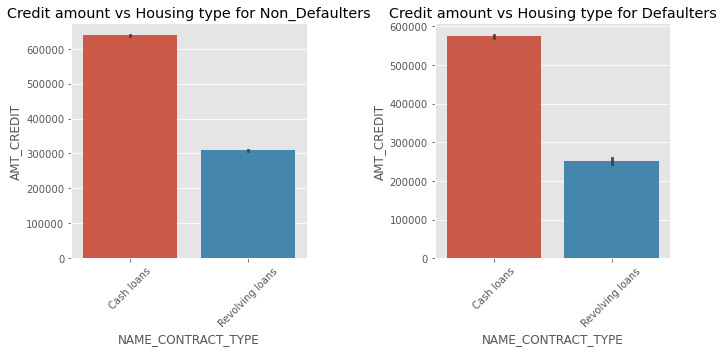

In [94]:
#NAME_CONTRACT_TYPE vs. AMT_CREDIT
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.xticks(rotation=45)
sns.barplot(data =app_data_T0, x='NAME_CONTRACT_TYPE', y='AMT_CREDIT')
plt.title('Credit amount vs Housing type for Non_Defaulters')

plt.subplot(1,2,2)
plt.xticks(rotation=45)
sns.barplot(data =app_data_T1, x='NAME_CONTRACT_TYPE', y='AMT_CREDIT')
plt.title('Credit amount vs Housing type for Defaulters')

plt.tight_layout()
plt.show()

**Observation:** People with high credit amounts tend to have applied for more cash loans than revolving loans.

5. **Reading the previous_application data**

In [95]:
#First let's check some paramters of previous_application data
#Dropping missing values greater than 40% in this data
null_percentage = (prev_data.isnull().sum()/len(prev_data))*100
null_percentage

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [96]:
prev_data = prev_data.drop(null_percentage[null_percentage>40].index,1)

In [97]:
prev_data.shape

(1670214, 26)

A. **Merging the two datasets - app_data & prev_data**

In [98]:
merged_data = pd.merge(app_data, prev_data, how='left', on=['SK_ID_CURR']) #rows?
#We performed a left join because we want our mail dataset to be app_data

In [99]:
merged_data.shape

(1118383, 64)

In [100]:
merged_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS',
       'WEEKDAY_APPR_PROCESS_START_x', 'HOUR_APPR_PROCESS_START_x',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'INCOME_RANGE', 'CREDIT_BIN', 'AGE',
       'AGE_GROUP', 'SK_ID_PREV', 'NAME_CONTRACT_TYPE_y', 'AMT_ANNUITY_y',
       'AMT_APPLIC

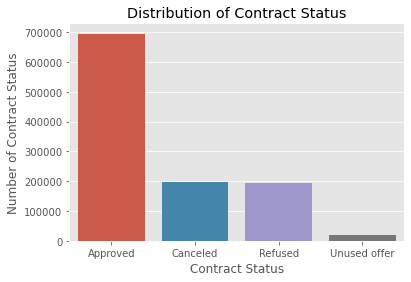

In [101]:
#creating a plot of variable 'NAME_CONTRACT_TYPE' which tells us the status of all the contracts
sns.countplot(merged_data.NAME_CONTRACT_STATUS)
plt.xlabel("Contract Status")
plt.ylabel("Number of Contract Status")
plt.title("Distribution of Contract Status")
plt.show()

In [102]:
#Dropping the unnecessary rows
merged_data=merged_data.drop(merged_data[merged_data['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
merged_data=merged_data.drop(merged_data[merged_data['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
merged_data=merged_data.drop(merged_data[prev_data['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

In [103]:
merged_data.shape

(314226, 64)

B. **Univariate and Bivariate Ananlysis** 

Univariate Analysis

Segregating the dataset into 4 categories:

In [104]:
approved=merged_data[merged_data.NAME_CONTRACT_STATUS=='Approved']
refused=merged_data[merged_data.NAME_CONTRACT_STATUS=='Refused']
cancelled=merged_data[merged_data.NAME_CONTRACT_STATUS=='Canceled']
unused=merged_data[merged_data.NAME_CONTRACT_STATUS=='Unused Offer']

In [105]:
def plot(var):
    fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(20,5))
    
    s1=sns.countplot(ax=ax1,x=refused[var], data=refused, order= refused[var].value_counts(normalize = True).index,)
    ax1.set_title("Refused", fontsize=10)
    ax1.set_xlabel('%s' %var)
    ax1.set_ylabel("Number of Loans")
    s1.set_xticklabels(s1.get_xticklabels(),rotation=0)
    
    s2=sns.countplot(ax=ax2,x=approved[var], data=approved, order= approved[var].value_counts(normalize = True).index,)
    s2.set_xticklabels(s2.get_xticklabels(),rotation=0)
    ax2.set_xlabel('%s' %var)
    ax2.set_ylabel("Number of Loans")
    ax2.set_title("Approved", fontsize=10)
    
    
    s3=sns.countplot(ax=ax3,x=cancelled[var], data=cancelled, order= cancelled[var].value_counts(normalize = True).index,)
    ax3.set_title("Cancelled", fontsize=10)
    ax3.set_xlabel('%s' %var)
    ax3.set_ylabel("Number of Loans")
    s3.set_xticklabels(s3.get_xticklabels(),rotation=0)
    plt.show()

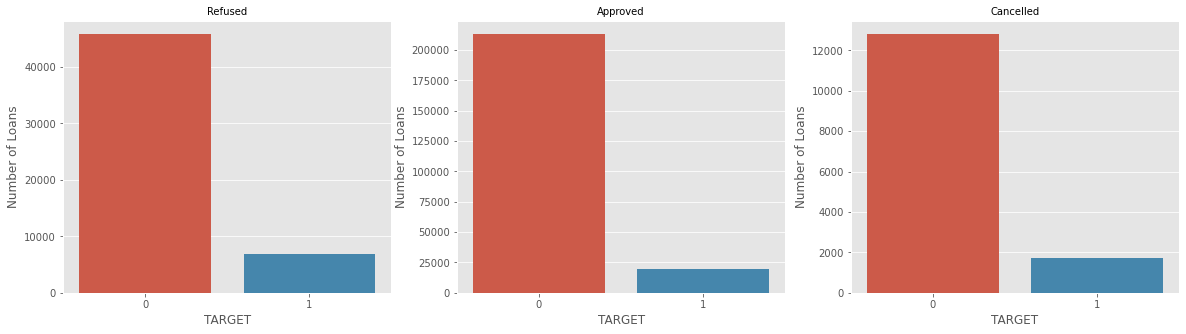

In [106]:
plot('TARGET')

In [107]:
refused.TARGET.value_counts(normalize = True) 

0    0.870846
1    0.129154
Name: TARGET, dtype: float64

In [108]:
approved.TARGET.value_counts(normalize = True)

0    0.916606
1    0.083394
Name: TARGET, dtype: float64

In [109]:
cancelled.TARGET.value_counts(normalize = True)

0    0.880566
1    0.119434
Name: TARGET, dtype: float64

**Observation:** Loans which have been refused and cancelled before have more chances to default as compared to the approved ones.

In [110]:
merged_data.groupby('NAME_HOUSING_TYPE')['NAME_CONTRACT_STATUS'].value_counts()/merged_data.groupby('NAME_HOUSING_TYPE')['NAME_CONTRACT_STATUS'].count()

NAME_HOUSING_TYPE    NAME_CONTRACT_STATUS
Co-op apartment      Approved                0.735557
                     Refused                 0.133442
                     Unused offer            0.092758
                     Canceled                0.038242
House / apartment    Approved                0.754607
                     Refused                 0.170362
                     Canceled                0.046780
                     Unused offer            0.028251
Municipal apartment  Approved                0.765452
                     Refused                 0.161107
                     Canceled                0.045852
                     Unused offer            0.027588
Office apartment     Approved                0.765877
                     Refused                 0.170237
                     Canceled                0.040210
                     Unused offer            0.023675
Rented apartment     Approved                0.751442
                     Refused            

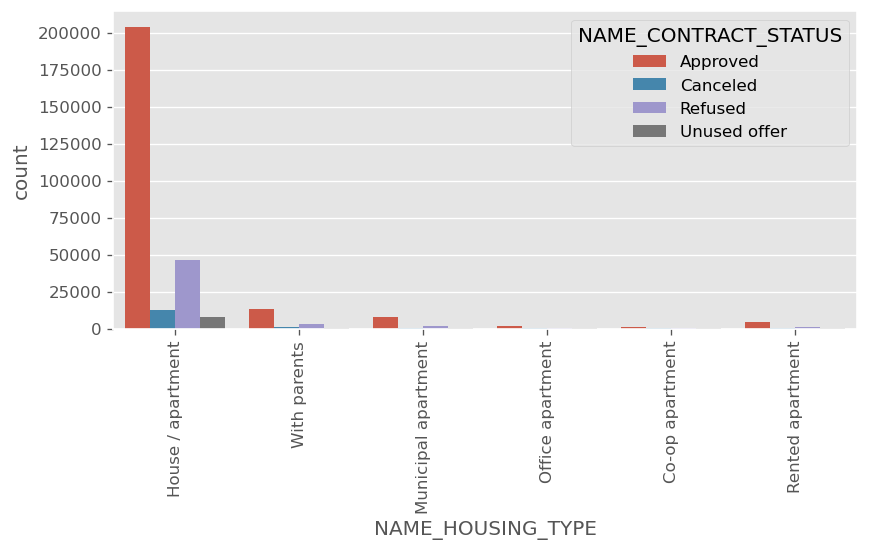

In [111]:
plt.figure(figsize=[8.0,3.5],dpi=120,edgecolor='c',frameon=True)
sns.countplot(data=merged_data,x='NAME_HOUSING_TYPE',hue='NAME_CONTRACT_STATUS')
plt.xticks(rotation=90)
plt.show()

**Observation:** Highest approved loans are from the housing type 'house/apartment'.

Bivariate Analysis

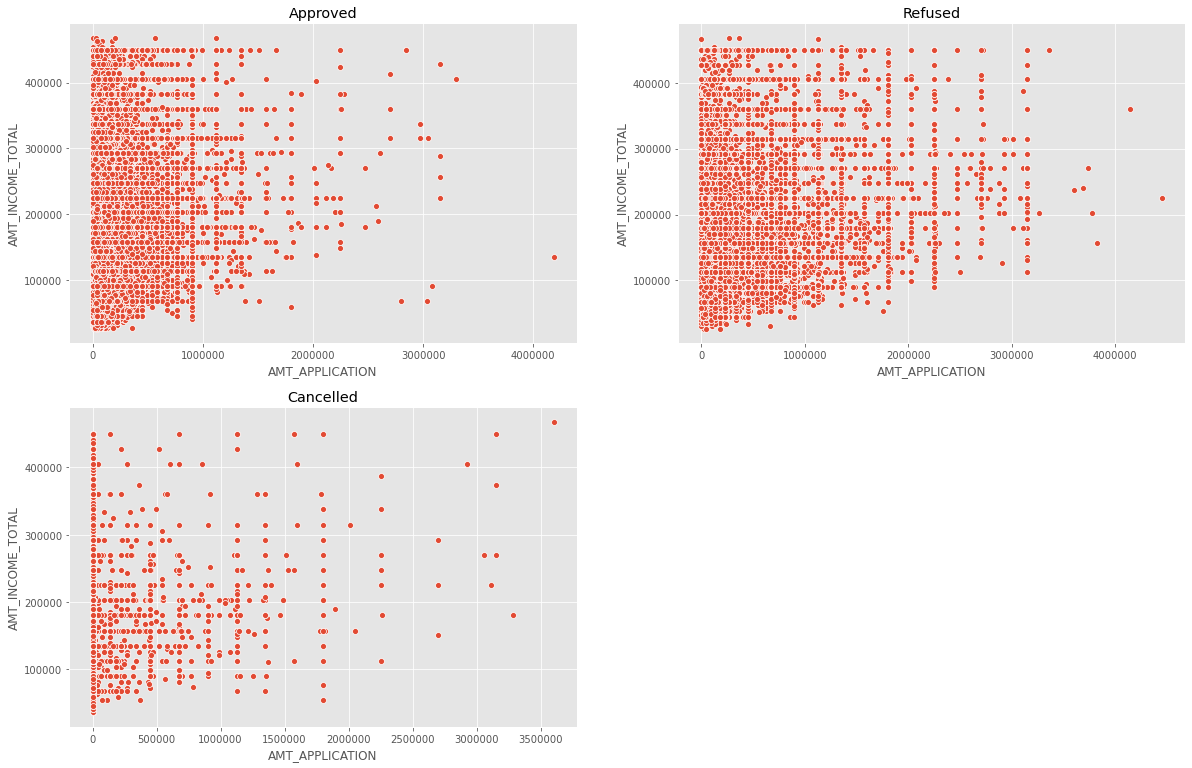

In [112]:
plt.figure(figsize = (20,20))
plt.subplot(3,2,1)
sns.scatterplot(x='AMT_APPLICATION',y='AMT_INCOME_TOTAL',data=approved)
plt.title('Approved')
plt.ticklabel_format(style= 'plain')

plt.subplot(3,2,2)
sns.scatterplot(x='AMT_APPLICATION',y='AMT_INCOME_TOTAL',data=refused) #
plt.title('Refused')
plt.ticklabel_format(style= 'plain')

plt.subplot(3,2,3)
sns.scatterplot(x='AMT_APPLICATION',y='AMT_INCOME_TOTAL',data=cancelled)
plt.title('Cancelled')
plt.ticklabel_format(style= 'plain')

plt.show()

**Observation:** ('AMT_APPLICATION' is - For how much credit did client ask in the previous application).
We can clearly observe - Highly densed cancelled loans fall under the income range of 2 lacs. Therefore, people with income lesser than 2 lacs have more chances of cancelling their loans.

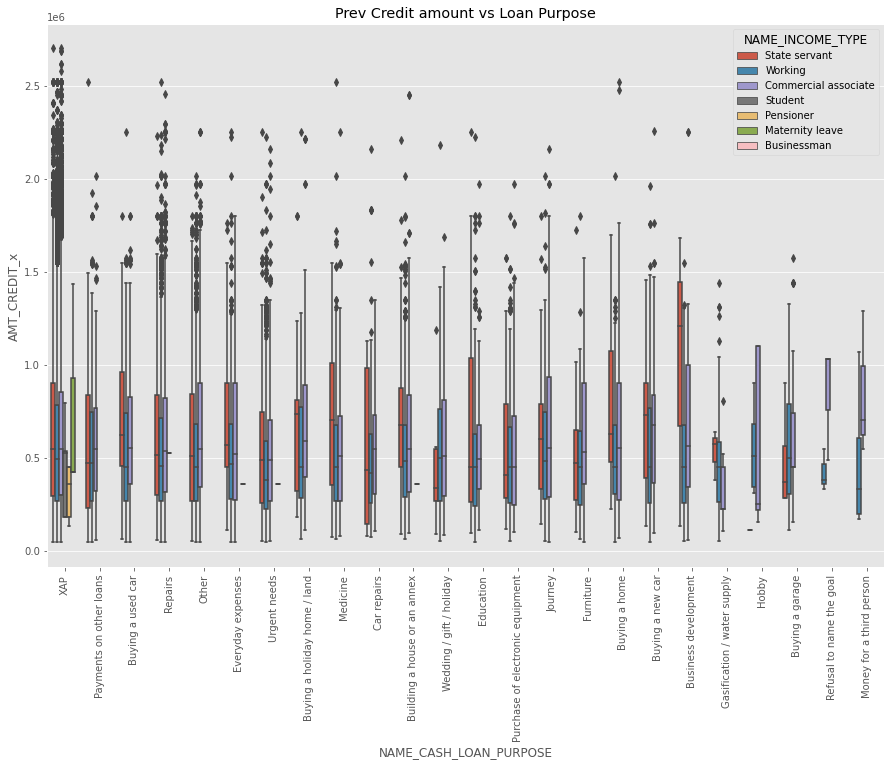

In [113]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.boxplot(data =merged_data, x='NAME_CASH_LOAN_PURPOSE',y='AMT_CREDIT_x',hue='NAME_INCOME_TYPE', orient='v')
plt.title('Prev Credit amount vs Loan Purpose')
plt.show()


**Observation:** 
- Credit amount for loan purposes like education, buying a home, business development is higher.
- Credit amount of commercial associate for loan purposes like everyday expenses and journey is very high.
- State Servant income type has significant amount of credit for many loan purposes.

**Default Rate Analysis**

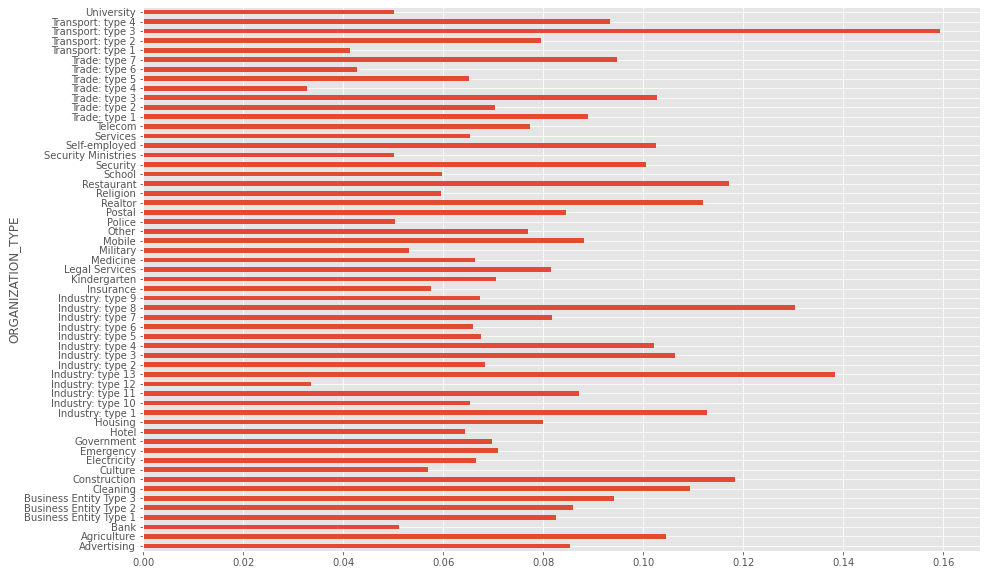

In [114]:
#ORGANIZATION_TYPE
plt.figure(figsize=(15,10))
(app_data.groupby('ORGANIZATION_TYPE')['TARGET'].sum()/app_data.groupby('ORGANIZATION_TYPE')['TARGET'].count()).plot(kind = 'barh', rot = 0)
plt.show()

The maximum defaults are by the 'Organization_Type' - Transporrt Type 3.

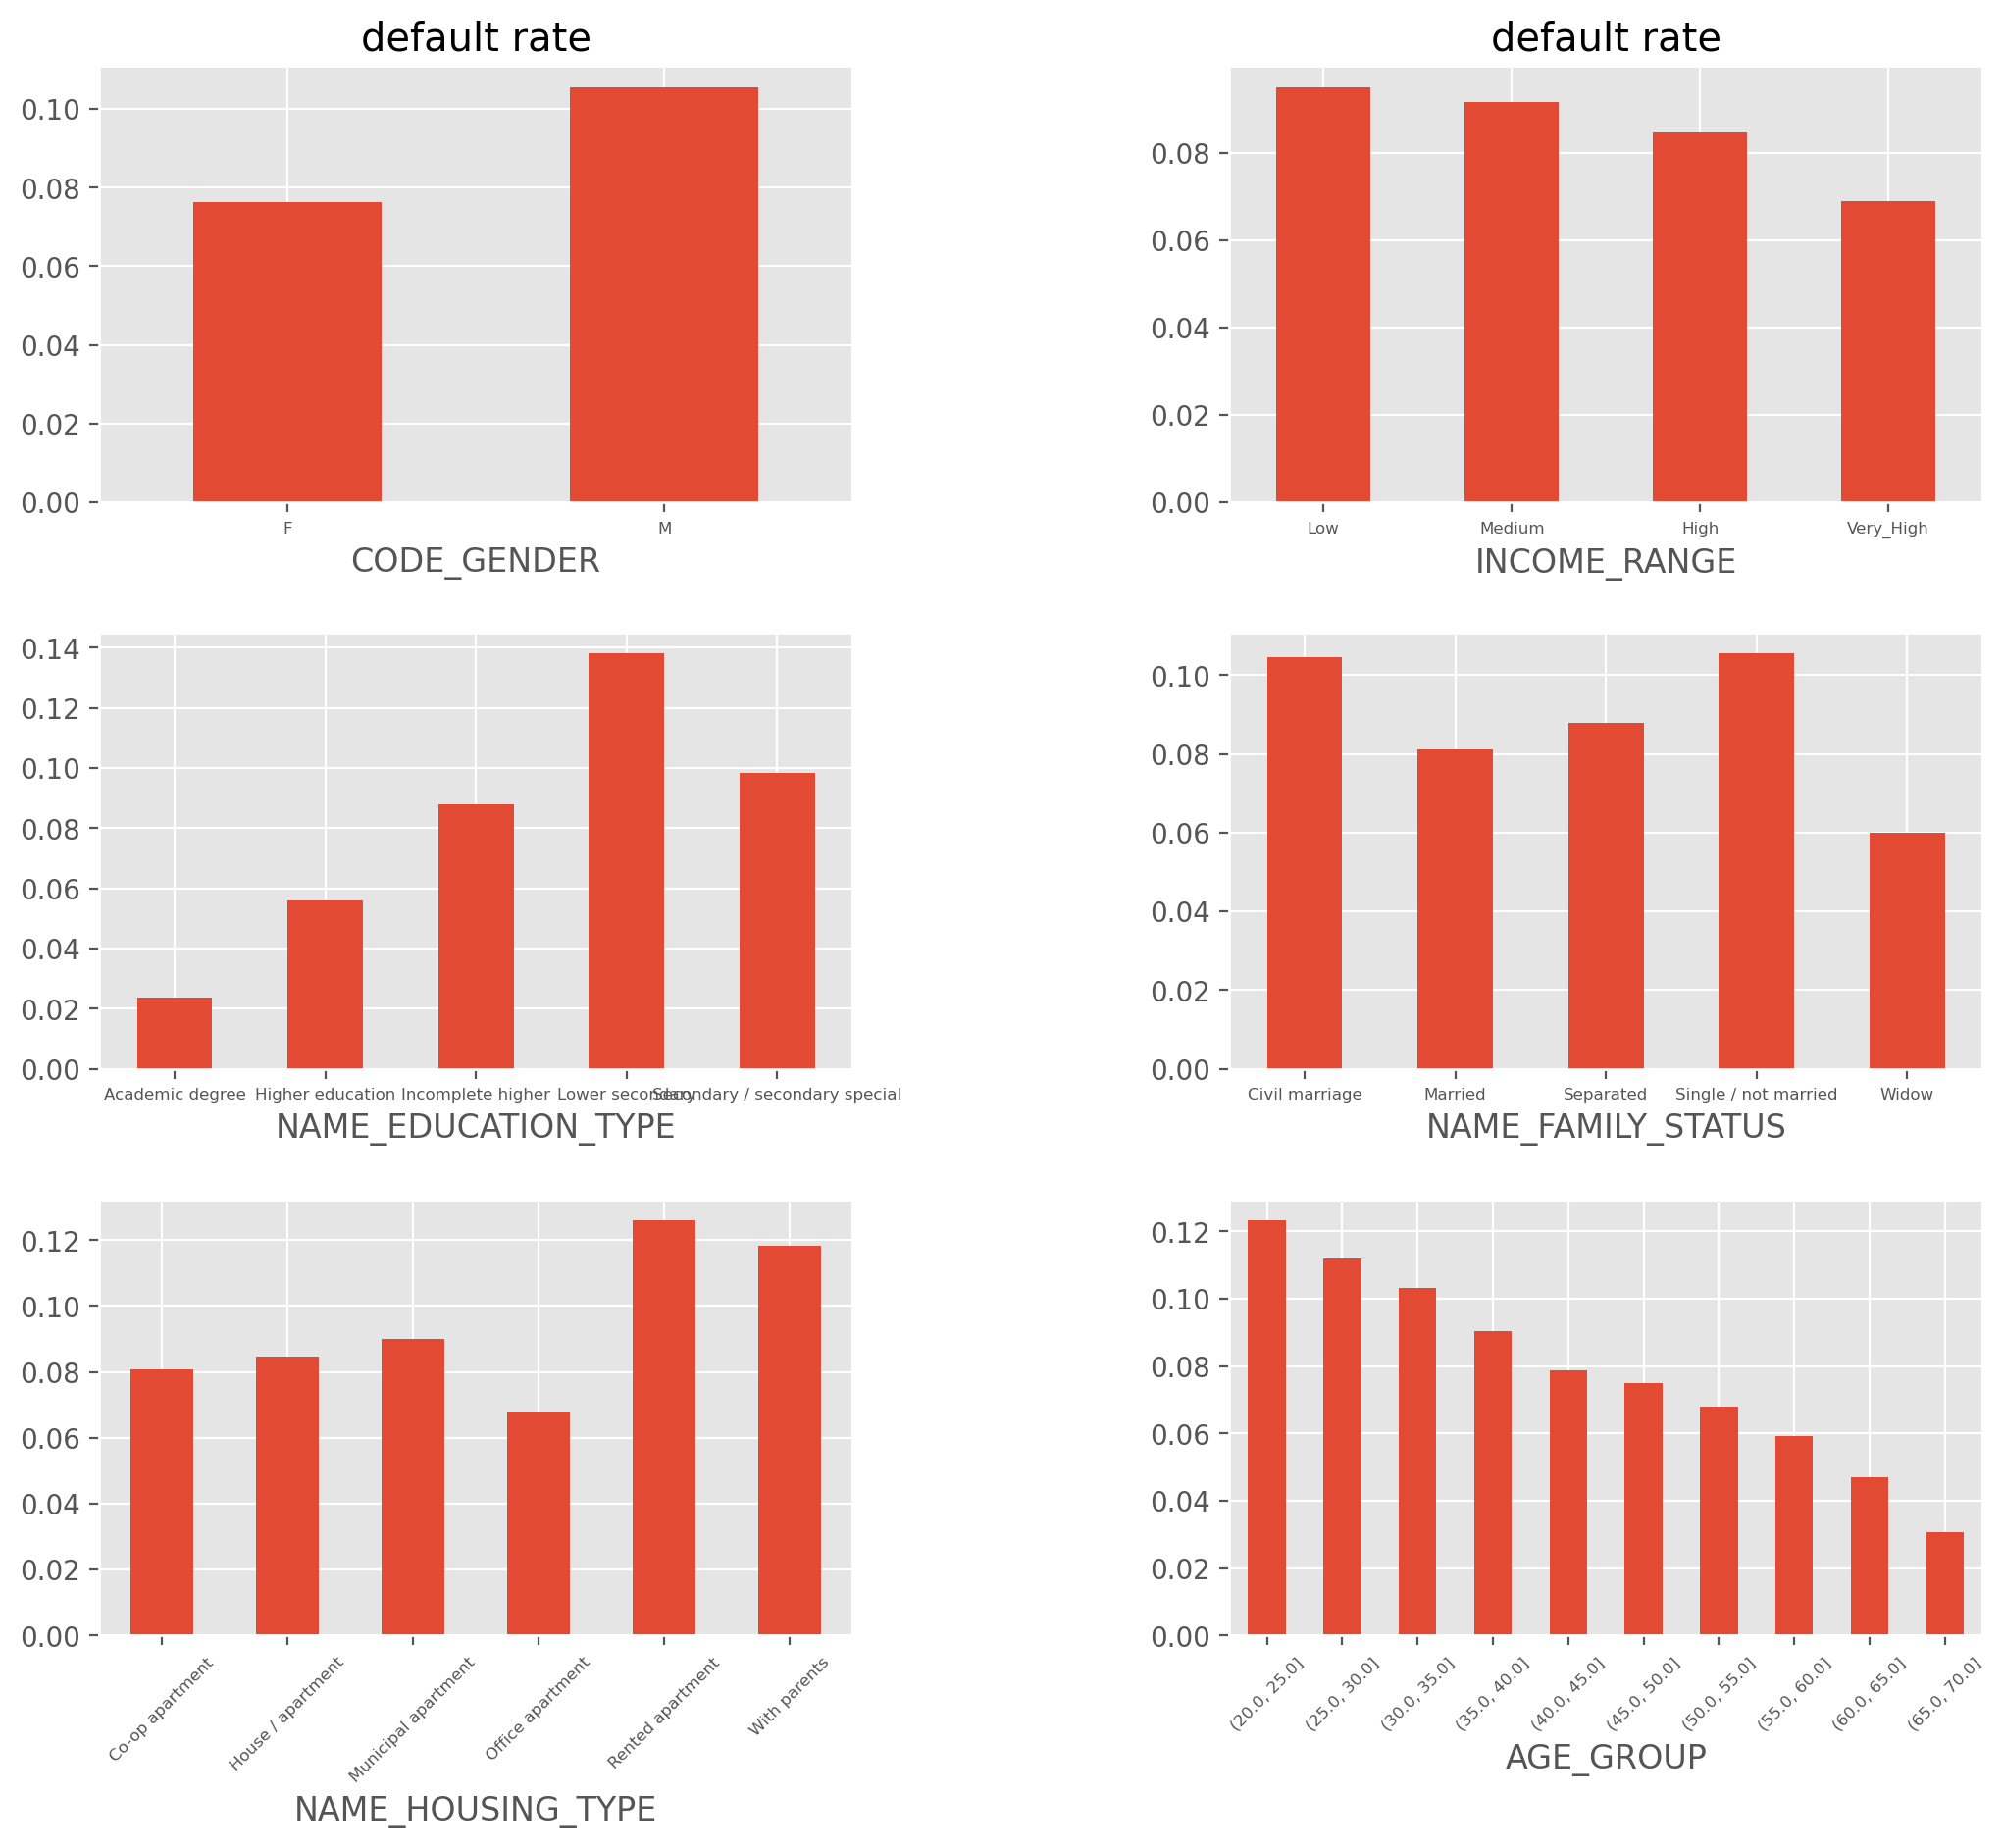

In [115]:
fig = plt.figure(figsize=(12, 10), dpi= 200, facecolor='w', edgecolor='k')
ax1 = fig.add_subplot(321)
(app_data.groupby('CODE_GENDER')['TARGET'].sum()/app_data.groupby('CODE_GENDER')['TARGET'].count()).plot(kind = 'bar', rot = 0, title="default rate", ax=ax1)
ax2 = fig.add_subplot(322)
(app_data.groupby('INCOME_RANGE')['TARGET'].sum()/app_data.groupby('INCOME_RANGE')['TARGET'].count()).plot(kind = 'bar', rot = 0, title="default rate", ax=ax2)
ax3 = fig.add_subplot(323)
(app_data.groupby('NAME_EDUCATION_TYPE')['TARGET'].sum()/app_data.groupby('NAME_EDUCATION_TYPE')['TARGET'].count()).plot(kind = 'bar', rot = 0, ax=ax3)
ax4 = fig.add_subplot(324)
(app_data.groupby('NAME_FAMILY_STATUS')['TARGET'].sum()/app_data.groupby('NAME_FAMILY_STATUS')['TARGET'].count()).plot(kind = 'bar', rot = 0, ax=ax4)
ax5 = fig.add_subplot(325)
(app_data.groupby('NAME_HOUSING_TYPE')['TARGET'].sum()/app_data.groupby('NAME_HOUSING_TYPE')['TARGET'].count()).plot(kind = 'bar', rot = 45,ax=ax5)
ax6 = fig.add_subplot(326)
(app_data.groupby('AGE_GROUP')['TARGET'].sum()/app_data.groupby('AGE_GROUP')['TARGET'].count()).plot(kind = 'bar', rot = 45, ax=ax6)

plt.tight_layout()
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.3)

ax1.tick_params(axis='x', labelsize=6)
ax2.tick_params(axis='x', labelsize=6)
ax3.tick_params(axis='x', labelsize=6)
ax4.tick_params(axis='x', labelsize=6)
ax5.tick_params(axis='x', labelsize=6)
ax6.tick_params(axis='x', labelsize=6)
plt.show()



Default rate is a ratio of Number of defaulted / Total Number of Loans in the segment that we are observing. Default rate tells us which category from a particular segment has had the highest to least number of defaults.

# Recommendations:
1. People with 'Low' income range have higher chances of defaulting, therefore we should focus on other income ranges over this.
2. People with 'Lower secondary' education and 'Single' status have the highest default rate. Therefore, we should be very careful while providing them loans. An authenticated guarantor's presence should be considered mandatory.
3. Among both genders, even though females are higher applicants than male, it is still observed that females are lesser defaulters than males. Therefore, providing loans to females over males can be a plus point.
3. People with 'Rented apartments' as their housing type are the highest defaulters. Therefore, we should check the security assets as well as the income of the applicant thoroughly.
4. Age group (20-25) are the highest defaulters. Whereas, income stablity is better in the age groups from 30 to 60 and they are less likely to default. Therefore, we should offer more loans to (30-60) age groups. 
5. People with housing types - 'office apartments' and 'with parents' are least likely to default as compared to other categories. Therefore, we should focus more on providing loans to these applicants.
6. Banks should focus less on income type ‘Working’ as they have most number of unsuccessful payments.  